# Initialize

In [31]:
from pupil_apriltags import Detector, Detection
from collections import defaultdict
from typing import List, Dict, Tuple, Any
from glob import glob
import numpy as np
import os
import time
import sys
import cv2
from math import atan2, degrees
import platform
import socket
import matplotlib.pyplot as plt
import math
import pandas as pd
import utils
import multiprocessing
from joblib import Parallel, delayed
from numpy import save
import pupil_functions
import decimal
import pickle
import extract_diameter
import operator
import pupil_filters
import seaborn as sns
from statsFuncs import mean_confidence_interval, numbers


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Paths 

In [32]:
datapath = os.getcwd() + '/data/'

if platform.system() == 'Darwin':
    EM_path = '/Users/teresa/recordings/TCB_GOOD/000/'    
elif platform.system() == 'Linux':
    EM_path = '/home/teresa/Documents/Naive_Spring_Eye_Recordings/Subject_CG/003/'

In [33]:
behavioral_data = pd.read_csv(datapath + 'TCB_VM_output_1nBack.csv')

# cut file just to have the 255 rows of data
behavioral_data = behavioral_data.iloc[range(255)]

# annotation_data = pd.read_csv(datapath + 'pl_msgs.csv')
timestamp_path = EM_path + 'world_timestamps.npy'

# Annotations 

In [34]:
annotation_data = pupil_functions.load_annotations(EM_path)

# Parameters 

In [35]:
min_confidence = 0.8
min_diameter = 1.5
max_diameter = 9

In [36]:
extract_diameter.main(recordings=[EM_path], csv_out='TCB_df_diameter.csv')

/Users/teresa/recordings/TCB_GOOD/000/TCB_df_diameter.csv exists already! Not overwriting.


/Users/teresa/recordings/TCB_GOOD/000/TCB_df_diameter.csv


In [37]:
df_diameter = pd.read_csv(EM_path + 'TCB_df_diameter.csv')

# Loop of trials 

In [38]:
trial_unique = behavioral_data.trialNumber.unique()
block_unique = behavioral_data.blockNumber.unique()

numBlocks = len(block_unique)
numTrials = len(trial_unique)

totalNumTrials = len(behavioral_data)

Processing block 1.0 out of 4
Processing trial 1.0 out of 85
17 bad samples removed out of 476 3.571428571428571%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


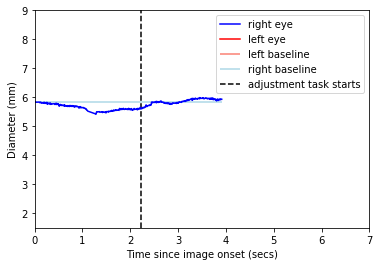

Processing trial 2.0 out of 85
32 bad samples removed out of 419 7.637231503579953%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


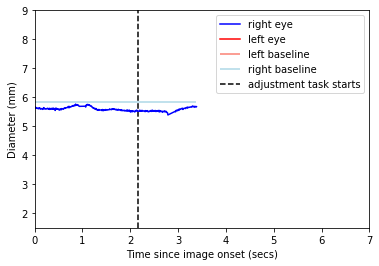

Processing trial 3.0 out of 85
44 bad samples removed out of 512 8.59375%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


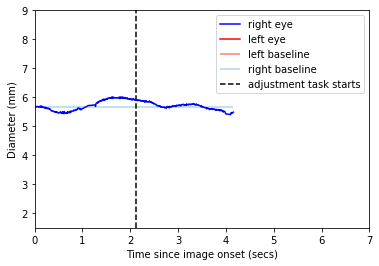

Processing trial 4.0 out of 85
82 bad samples removed out of 624 13.141025641025642%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


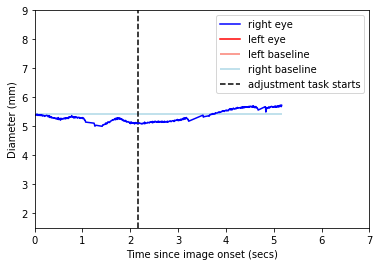

Processing trial 5.0 out of 85
48 bad samples removed out of 624 7.6923076923076925%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


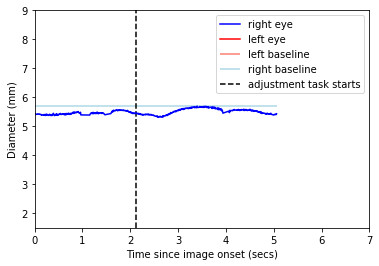

Processing trial 6.0 out of 85
55 bad samples removed out of 532 10.338345864661653%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


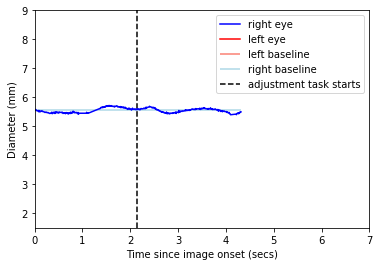

Processing trial 7.0 out of 85
46 bad samples removed out of 504 9.126984126984127%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


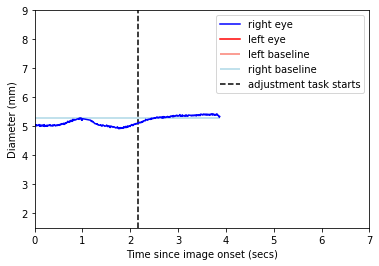

Processing trial 8.0 out of 85
35 bad samples removed out of 602 5.813953488372093%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


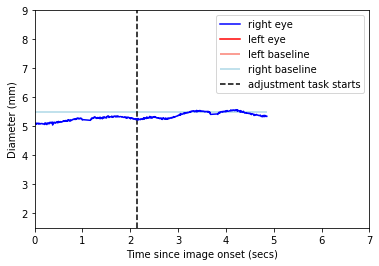

Processing trial 9.0 out of 85
34 bad samples removed out of 530 6.415094339622642%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


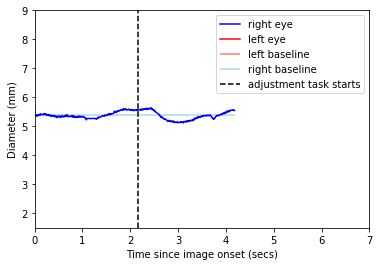

Processing trial 10.0 out of 85
32 bad samples removed out of 501 6.387225548902195%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


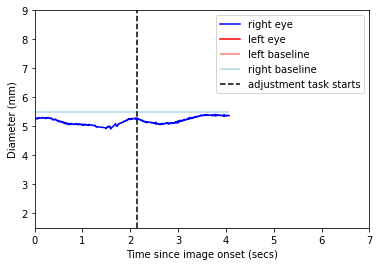

Processing trial 11.0 out of 85
51 bad samples removed out of 582 8.762886597938143%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


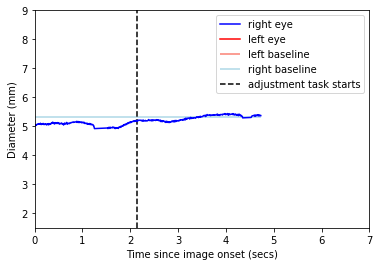

Processing trial 12.0 out of 85
59 bad samples removed out of 764 7.722513089005235%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


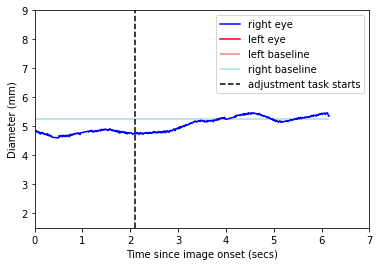

Processing trial 13.0 out of 85
27 bad samples removed out of 395 6.8354430379746836%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


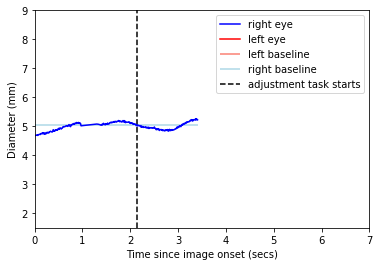

Processing trial 14.0 out of 85
52 bad samples removed out of 525 9.904761904761905%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


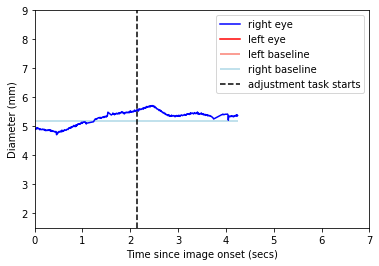

Processing trial 15.0 out of 85
64 bad samples removed out of 717 8.92608089260809%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


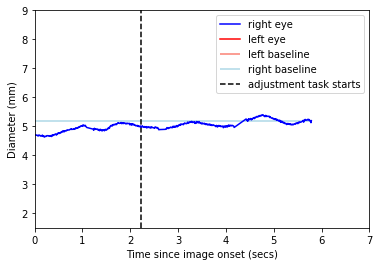

Processing trial 16.0 out of 85
63 bad samples removed out of 492 12.804878048780488%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


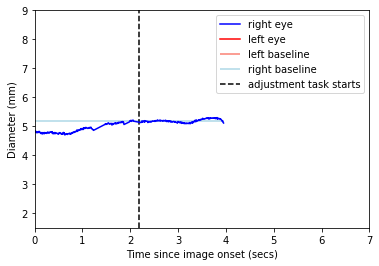

Processing trial 17.0 out of 85
69 bad samples removed out of 535 12.897196261682243%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


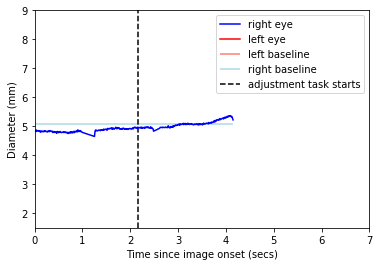

Processing trial 18.0 out of 85
74 bad samples removed out of 621 11.916264090177133%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


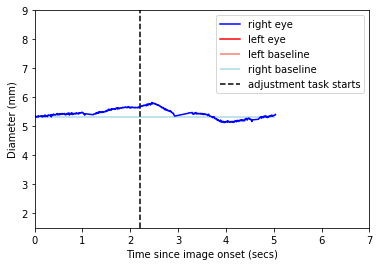

Processing trial 19.0 out of 85
108 bad samples removed out of 689 15.674891146589259%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


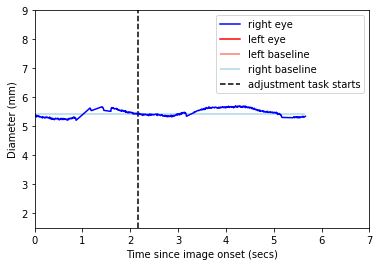

Processing trial 20.0 out of 85
76 bad samples removed out of 795 9.559748427672957%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


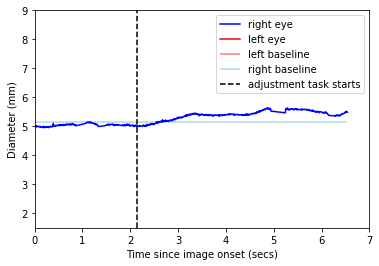

Processing trial 21.0 out of 85
59 bad samples removed out of 631 9.350237717908081%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


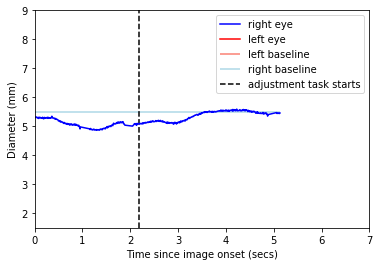

Processing trial 22.0 out of 85
78 bad samples removed out of 569 13.708260105448156%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


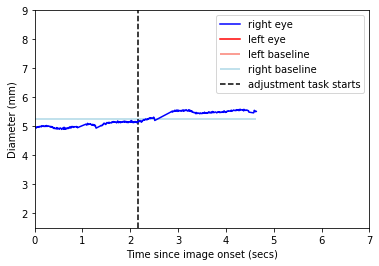

Processing trial 23.0 out of 85
44 bad samples removed out of 602 7.308970099667775%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


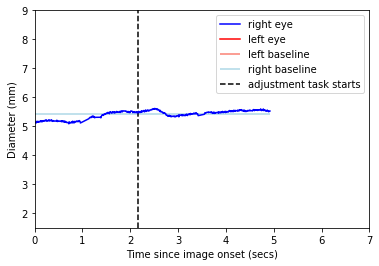

Processing trial 24.0 out of 85
69 bad samples removed out of 562 12.277580071174377%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


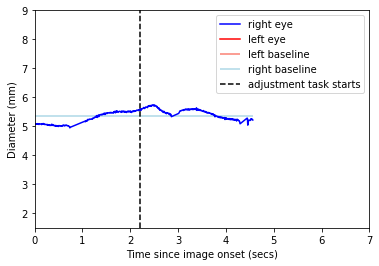

Processing trial 25.0 out of 85
37 bad samples removed out of 467 7.922912205567452%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


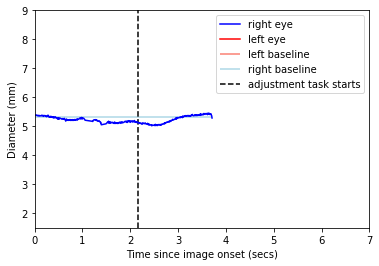

Processing trial 26.0 out of 85
28 bad samples removed out of 473 5.9196617336152215%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


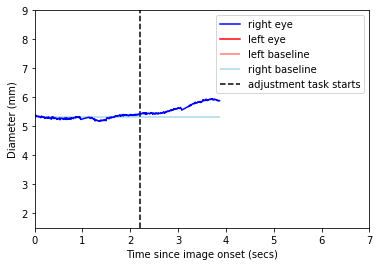

Processing trial 27.0 out of 85
74 bad samples removed out of 546 13.553113553113553%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


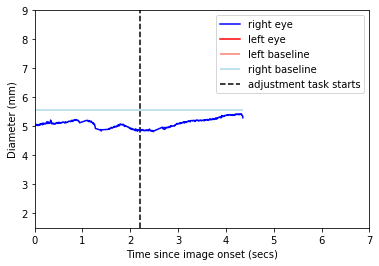

Processing trial 28.0 out of 85
94 bad samples removed out of 711 13.220815752461323%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


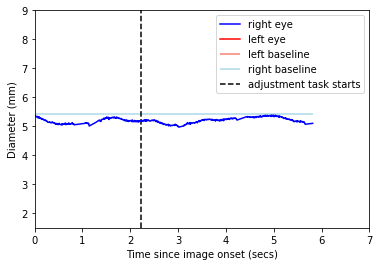

Processing trial 29.0 out of 85
42 bad samples removed out of 526 7.984790874524715%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


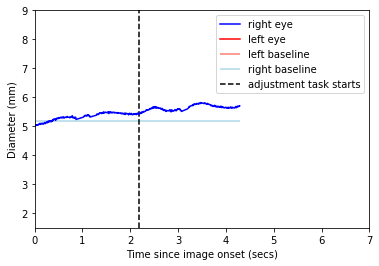

Processing trial 30.0 out of 85
92 bad samples removed out of 521 17.65834932821497%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


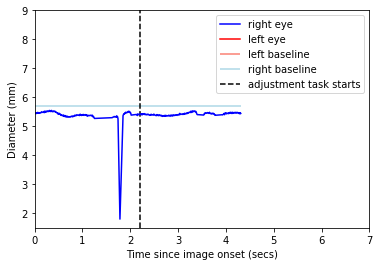

Processing trial 31.0 out of 85
54 bad samples removed out of 598 9.03010033444816%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


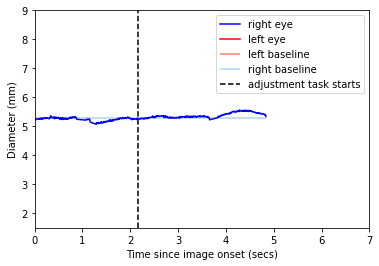

Processing trial 32.0 out of 85
50 bad samples removed out of 637 7.849293563579278%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


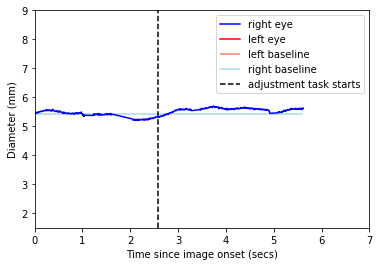

Processing trial 33.0 out of 85
45 bad samples removed out of 646 6.96594427244582%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


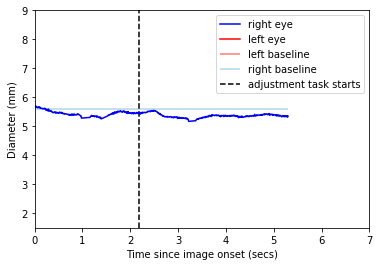

Processing trial 34.0 out of 85
30 bad samples removed out of 424 7.0754716981132075%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


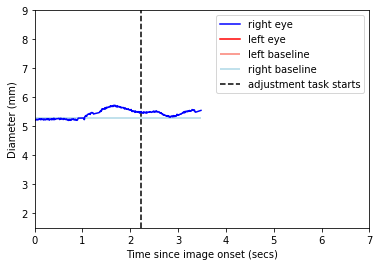

Processing trial 35.0 out of 85
66 bad samples removed out of 655 10.076335877862595%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


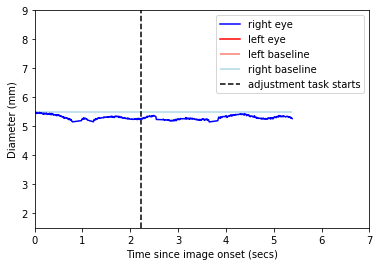

Processing trial 36.0 out of 85
57 bad samples removed out of 547 10.420475319926874%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


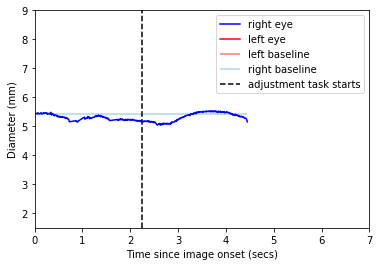

Processing trial 37.0 out of 85
42 bad samples removed out of 673 6.240713224368499%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


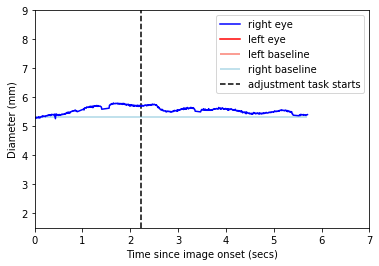

Processing trial 38.0 out of 85
72 bad samples removed out of 867 8.304498269896193%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


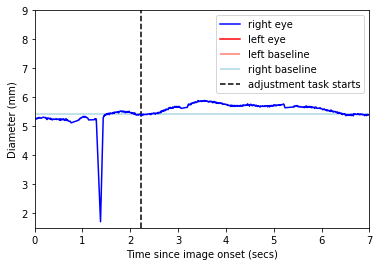

Processing trial 39.0 out of 85
45 bad samples removed out of 508 8.858267716535433%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


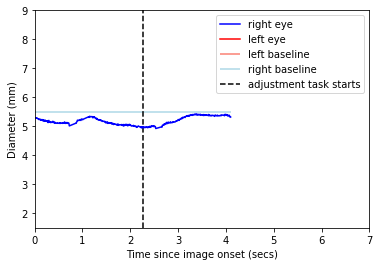

Processing trial 40.0 out of 85
22 bad samples removed out of 613 3.588907014681892%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


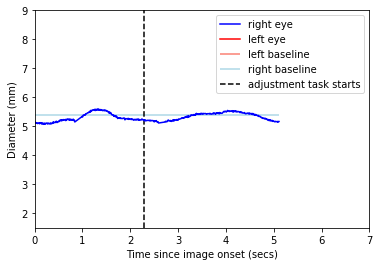

Processing trial 41.0 out of 85
32 bad samples removed out of 588 5.442176870748299%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


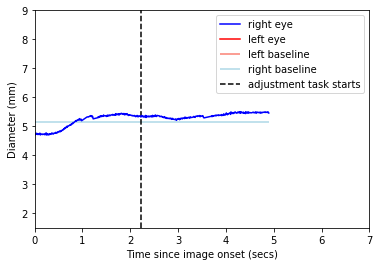

Processing trial 42.0 out of 85
51 bad samples removed out of 703 7.254623044096728%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


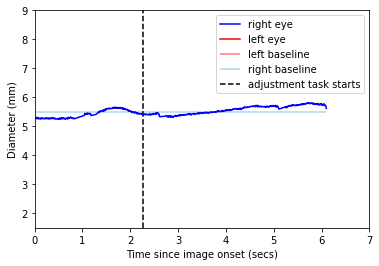

Processing trial 43.0 out of 85
36 bad samples removed out of 616 5.844155844155844%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


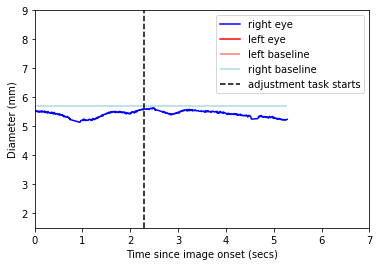

Processing trial 44.0 out of 85
43 bad samples removed out of 547 7.861060329067642%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


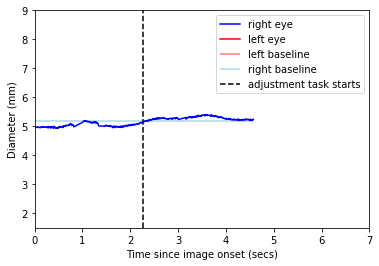

Processing trial 45.0 out of 85
42 bad samples removed out of 519 8.092485549132949%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


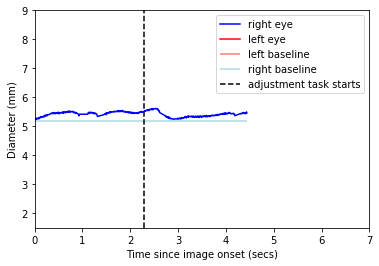

Processing trial 46.0 out of 85
43 bad samples removed out of 414 10.38647342995169%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


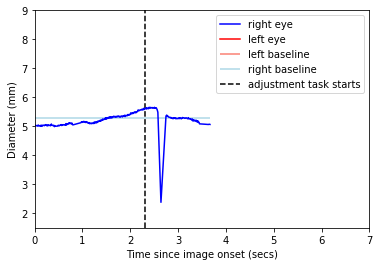

Processing trial 47.0 out of 85
48 bad samples removed out of 688 6.976744186046512%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


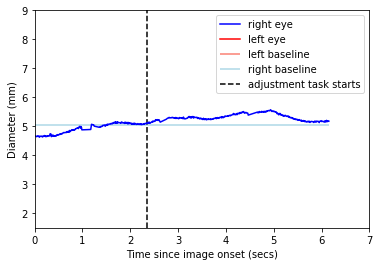

Processing trial 48.0 out of 85
33 bad samples removed out of 467 7.066381156316917%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


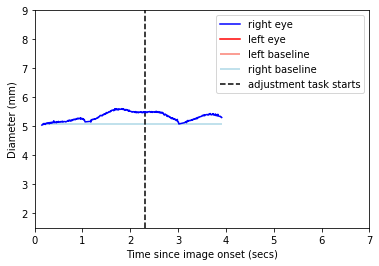

Processing trial 49.0 out of 85
52 bad samples removed out of 556 9.352517985611511%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


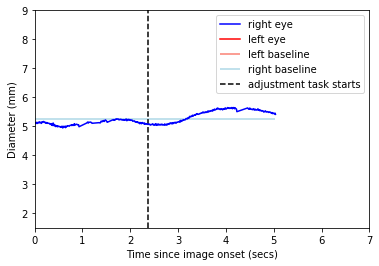

Processing trial 50.0 out of 85
46 bad samples removed out of 633 7.266982622432859%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


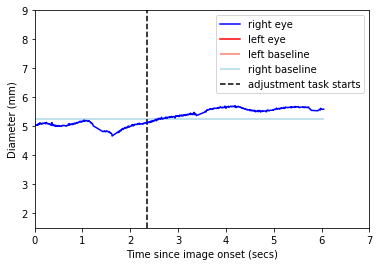

Processing trial 51.0 out of 85
31 bad samples removed out of 422 7.345971563981042%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


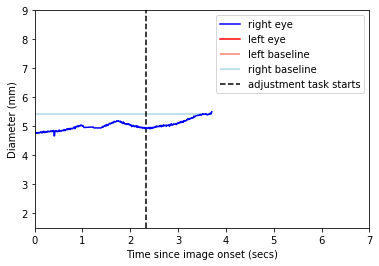

Processing trial 52.0 out of 85
53 bad samples removed out of 862 6.148491879350348%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


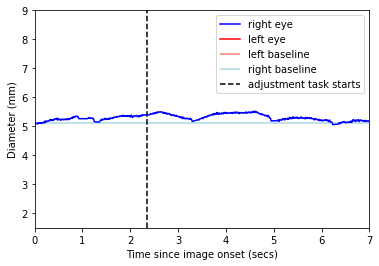

Processing trial 53.0 out of 85
63 bad samples removed out of 687 9.170305676855897%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


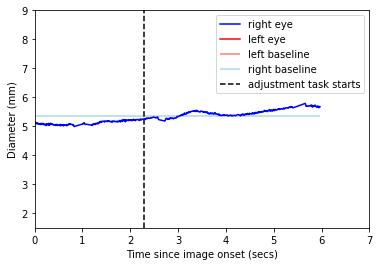

Processing trial 54.0 out of 85
77 bad samples removed out of 610 12.622950819672132%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


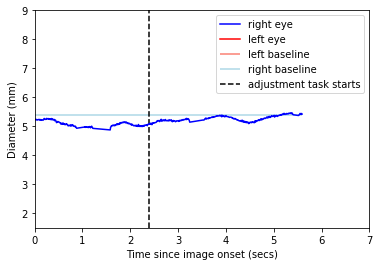

Processing trial 55.0 out of 85
33 bad samples removed out of 464 7.112068965517242%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


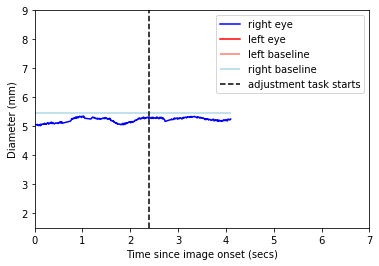

Processing trial 56.0 out of 85
45 bad samples removed out of 389 11.568123393316196%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


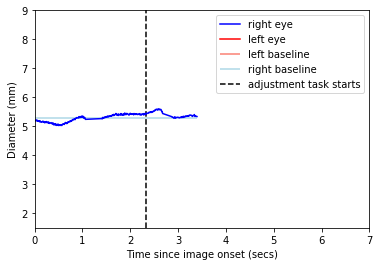

Processing trial 57.0 out of 85
20 bad samples removed out of 311 6.430868167202572%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


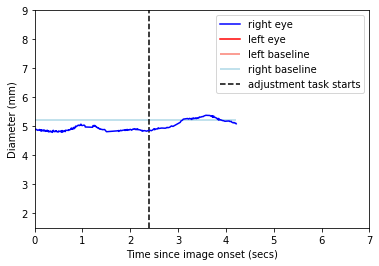

Processing trial 58.0 out of 85
61 bad samples removed out of 607 10.049423393739703%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


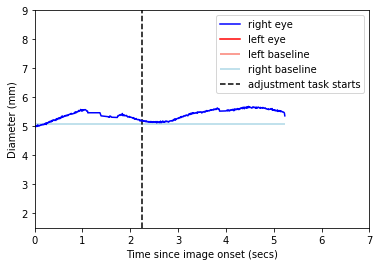

Processing trial 59.0 out of 85
40 bad samples removed out of 633 6.31911532385466%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


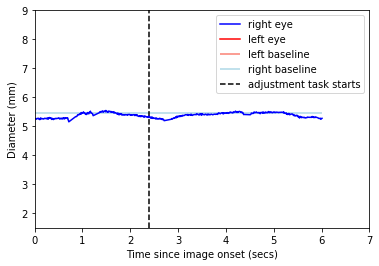

Processing trial 60.0 out of 85
31 bad samples removed out of 565 5.486725663716814%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


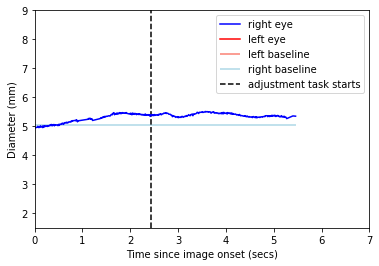

Processing trial 61.0 out of 85
32 bad samples removed out of 472 6.779661016949152%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


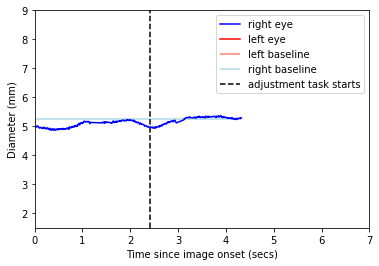

Processing trial 62.0 out of 85
47 bad samples removed out of 649 7.24191063174114%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


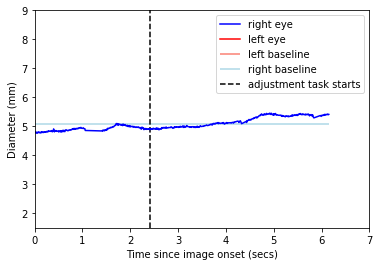

Processing trial 63.0 out of 85
40 bad samples removed out of 577 6.932409012131716%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


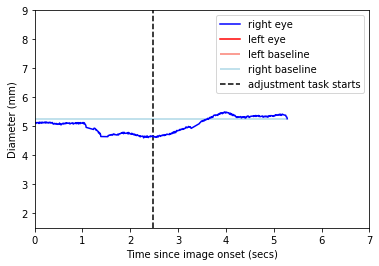

Processing trial 64.0 out of 85
24 bad samples removed out of 519 4.624277456647398%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


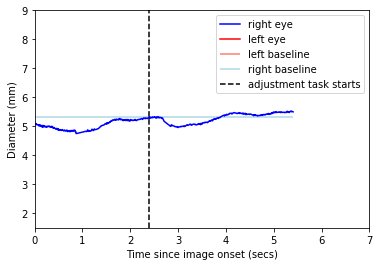

Processing trial 65.0 out of 85
24 bad samples removed out of 402 5.970149253731343%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


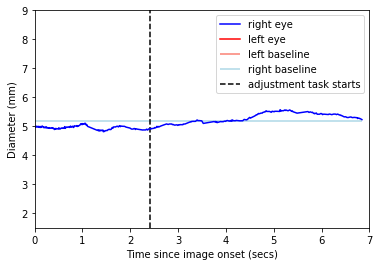

Processing trial 66.0 out of 85
31 bad samples removed out of 443 6.997742663656885%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


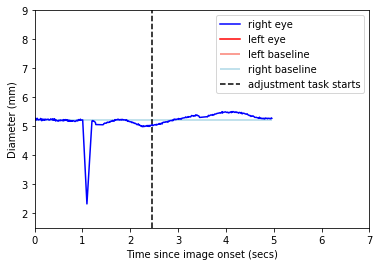

Processing trial 67.0 out of 85
34 bad samples removed out of 300 11.333333333333332%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


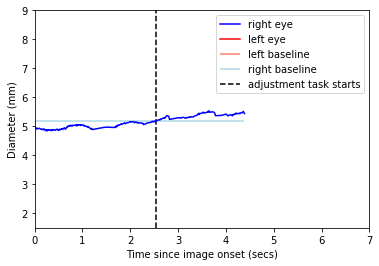

Processing trial 68.0 out of 85
59 bad samples removed out of 525 11.238095238095239%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


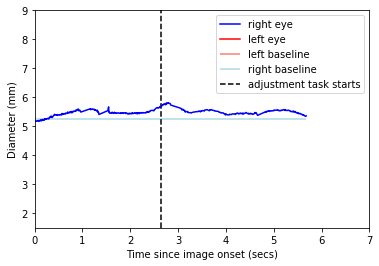

Processing trial 69.0 out of 85
29 bad samples removed out of 357 8.123249299719888%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


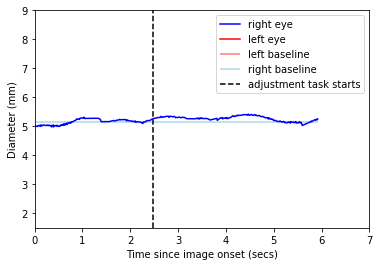

Processing trial 70.0 out of 85
21 bad samples removed out of 320 6.5625%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


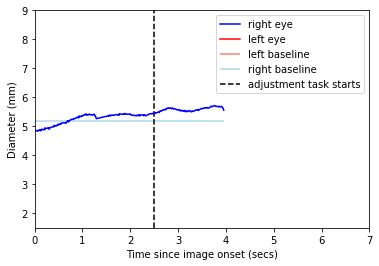

Processing trial 71.0 out of 85
23 bad samples removed out of 342 6.725146198830409%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


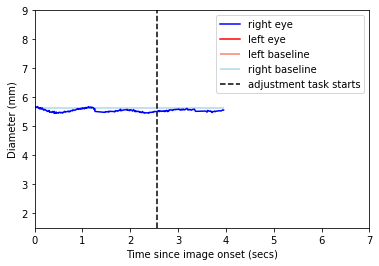

Processing trial 72.0 out of 85
33 bad samples removed out of 561 5.88235294117647%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


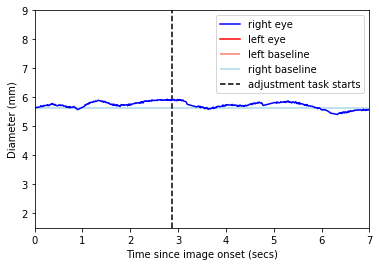

Processing trial 73.0 out of 85
24 bad samples removed out of 430 5.5813953488372094%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


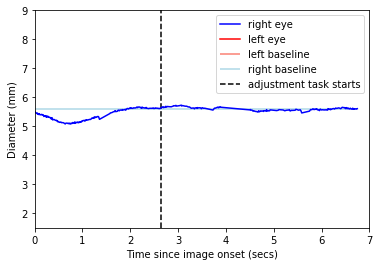

Processing trial 74.0 out of 85
28 bad samples removed out of 354 7.909604519774012%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


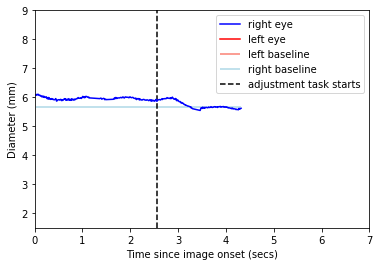

Processing trial 75.0 out of 85
27 bad samples removed out of 370 7.297297297297297%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


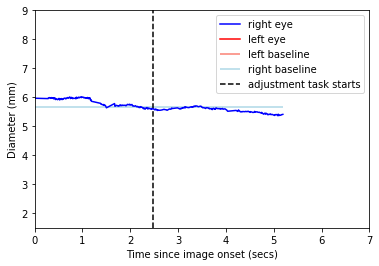

Processing trial 76.0 out of 85
16 bad samples removed out of 435 3.67816091954023%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


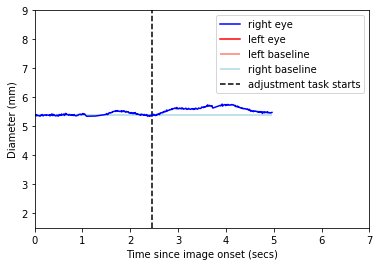

Processing trial 77.0 out of 85
40 bad samples removed out of 444 9.00900900900901%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


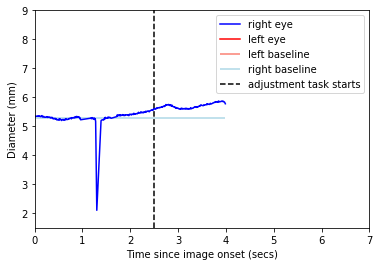

Processing trial 78.0 out of 85
52 bad samples removed out of 376 13.829787234042554%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


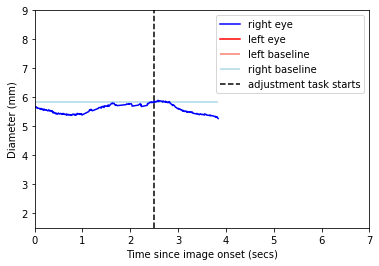

Processing trial 79.0 out of 85
23 bad samples removed out of 590 3.898305084745763%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


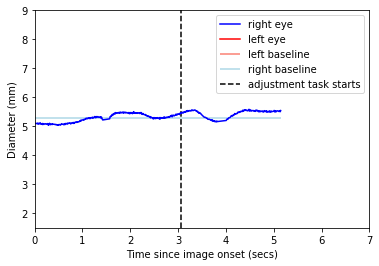

Processing trial 80.0 out of 85
23 bad samples removed out of 536 4.291044776119403%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


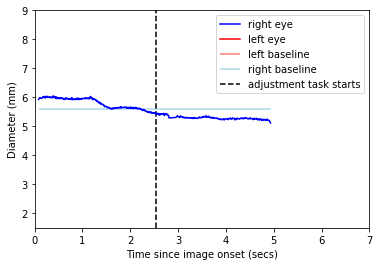

Processing trial 81.0 out of 85
16 bad samples removed out of 518 3.088803088803089%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


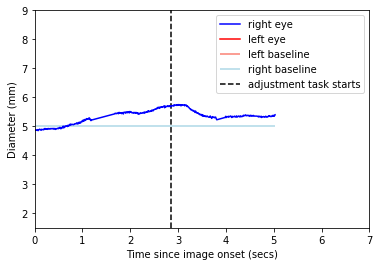

Processing trial 82.0 out of 85
29 bad samples removed out of 558 5.197132616487455%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


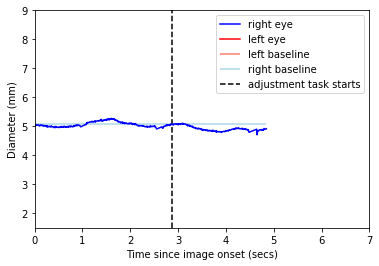

Processing trial 83.0 out of 85
22 bad samples removed out of 336 6.547619047619048%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


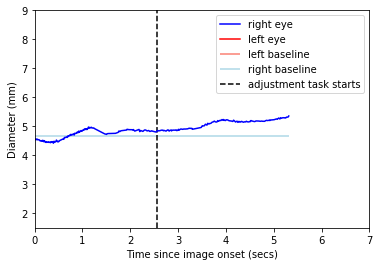

Processing trial 84.0 out of 85
33 bad samples removed out of 455 7.252747252747254%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


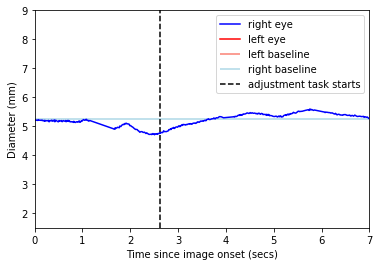

Processing block 2.0 out of 4
Processing trial 1.0 out of 85
14 bad samples removed out of 366 3.825136612021858%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


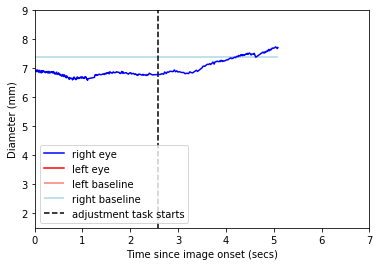

Processing trial 2.0 out of 85
14 bad samples removed out of 552 2.536231884057971%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


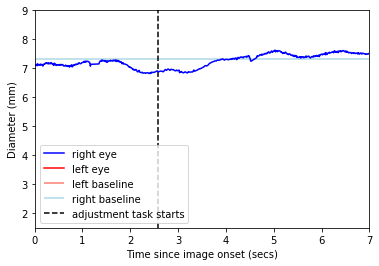

Processing trial 3.0 out of 85
15 bad samples removed out of 578 2.5951557093425603%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


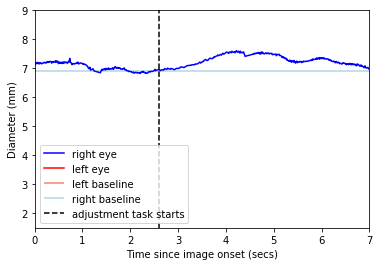

Processing trial 4.0 out of 85
20 bad samples removed out of 526 3.802281368821293%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


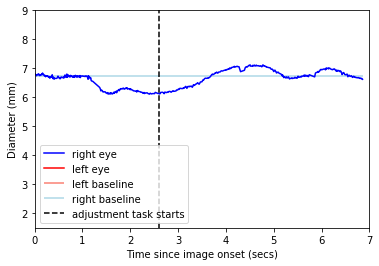

Processing trial 5.0 out of 85
18 bad samples removed out of 391 4.603580562659847%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


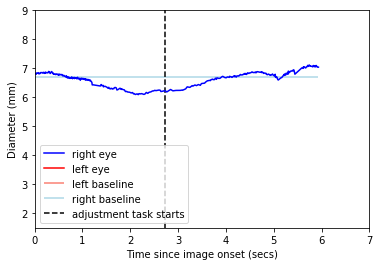

Processing trial 6.0 out of 85
26 bad samples removed out of 401 6.483790523690773%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


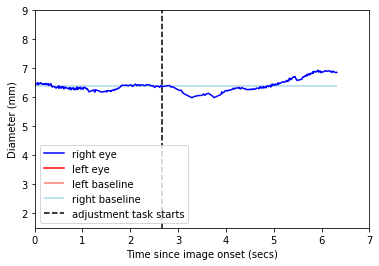

Processing trial 7.0 out of 85
17 bad samples removed out of 291 5.841924398625429%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


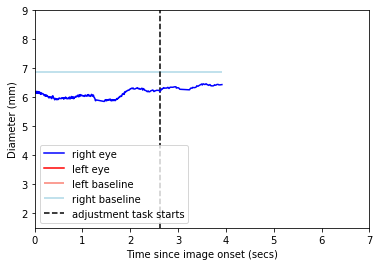

Processing trial 8.0 out of 85
37 bad samples removed out of 646 5.727554179566564%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


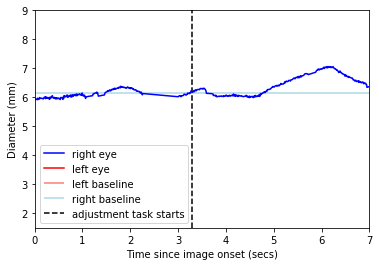

Processing trial 9.0 out of 85
29 bad samples removed out of 431 6.728538283062645%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


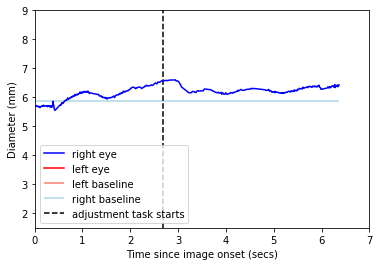

Processing trial 10.0 out of 85
25 bad samples removed out of 377 6.631299734748011%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


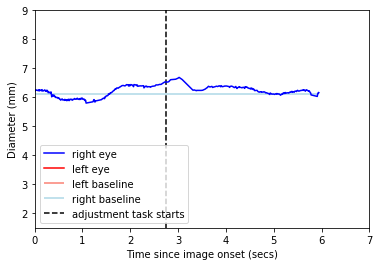

Processing trial 11.0 out of 85
36 bad samples removed out of 386 9.32642487046632%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


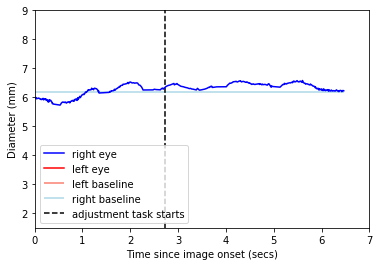

Processing trial 12.0 out of 85
27 bad samples removed out of 466 5.793991416309012%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


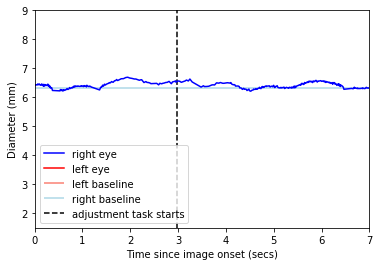

Processing trial 13.0 out of 85
29 bad samples removed out of 436 6.651376146788992%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


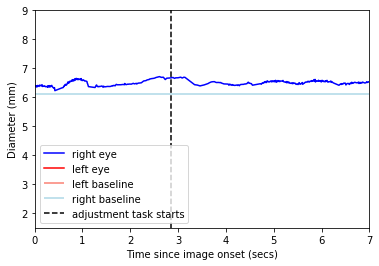

Processing trial 14.0 out of 85
38 bad samples removed out of 291 13.058419243986256%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


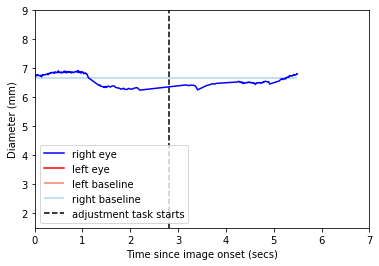

Processing trial 15.0 out of 85
21 bad samples removed out of 297 7.07070707070707%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


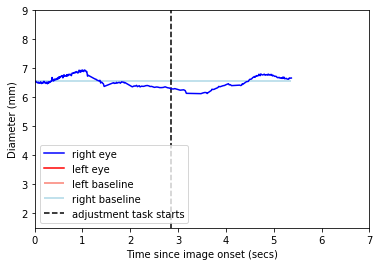

Processing trial 16.0 out of 85
30 bad samples removed out of 488 6.147540983606557%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


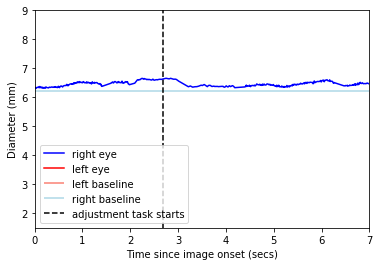

Processing trial 17.0 out of 85
16 bad samples removed out of 280 5.714285714285714%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


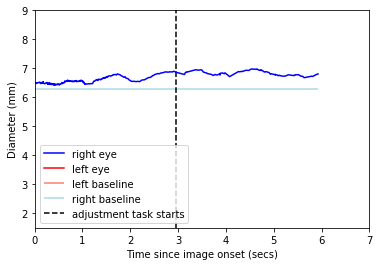

Processing trial 18.0 out of 85
23 bad samples removed out of 358 6.424581005586592%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


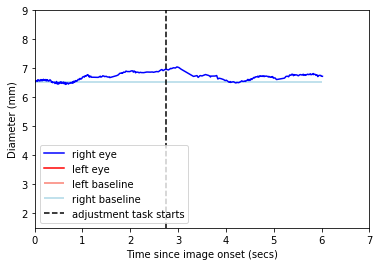

Processing trial 19.0 out of 85
28 bad samples removed out of 340 8.235294117647058%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


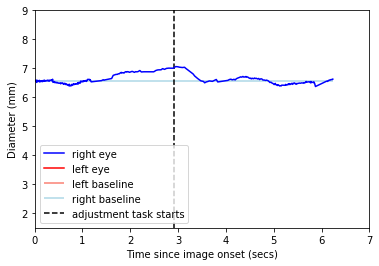

Processing trial 20.0 out of 85
37 bad samples removed out of 449 8.240534521158128%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


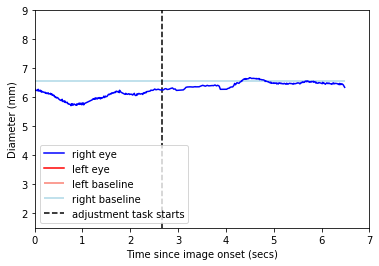

Processing trial 21.0 out of 85
28 bad samples removed out of 238 11.76470588235294%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


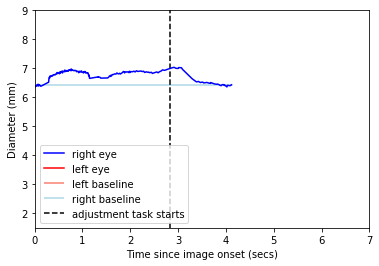

Processing trial 22.0 out of 85
74 bad samples removed out of 563 13.143872113676732%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


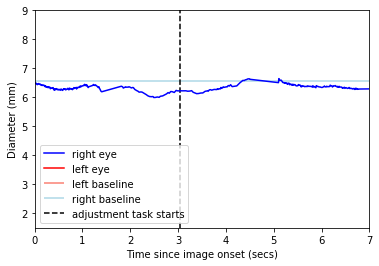

Processing trial 23.0 out of 85
74 bad samples removed out of 416 17.78846153846154%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


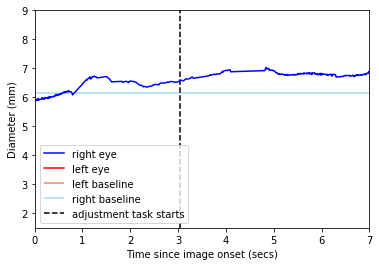

Processing trial 24.0 out of 85
35 bad samples removed out of 480 7.291666666666667%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


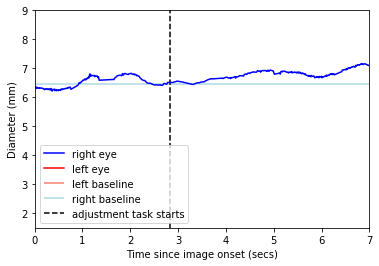

Processing trial 25.0 out of 85
25 bad samples removed out of 273 9.157509157509157%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


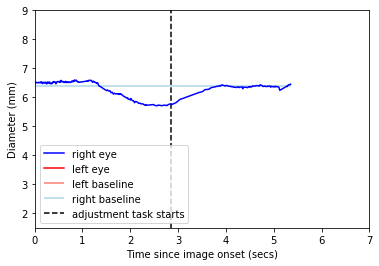

Processing trial 26.0 out of 85
82 bad samples removed out of 367 22.3433242506812%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


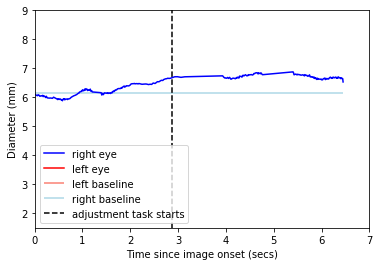

Processing trial 27.0 out of 85
38 bad samples removed out of 466 8.15450643776824%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


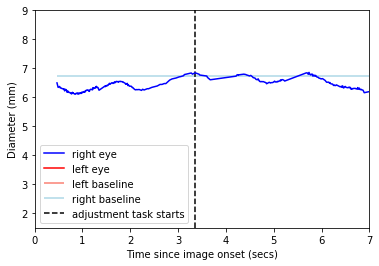

Processing trial 28.0 out of 85
35 bad samples removed out of 305 11.475409836065573%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


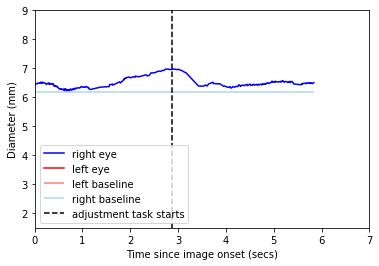

Processing trial 29.0 out of 85
53 bad samples removed out of 420 12.619047619047619%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


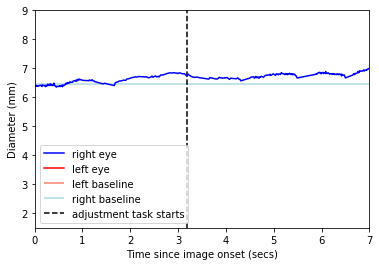

Processing trial 30.0 out of 85
15 bad samples removed out of 247 6.0728744939271255%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


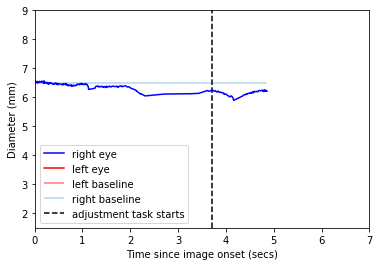

Processing trial 31.0 out of 85
56 bad samples removed out of 495 11.313131313131313%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


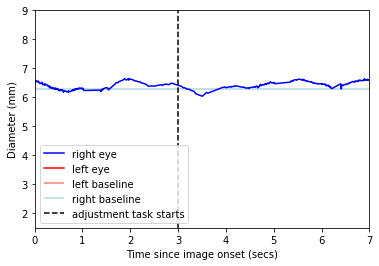

Processing trial 32.0 out of 85
24 bad samples removed out of 228 10.526315789473683%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


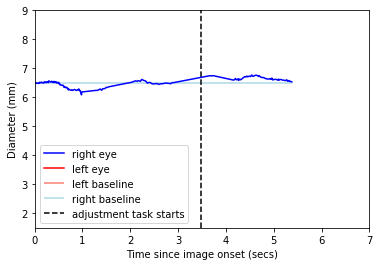

Processing trial 33.0 out of 85
29 bad samples removed out of 422 6.872037914691943%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


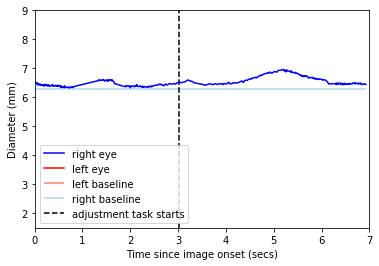

Processing trial 34.0 out of 85
7 bad samples removed out of 202 3.4653465346534658%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


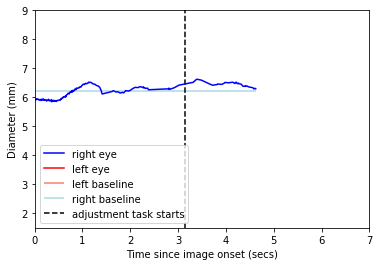

Processing trial 35.0 out of 85
18 bad samples removed out of 322 5.590062111801243%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


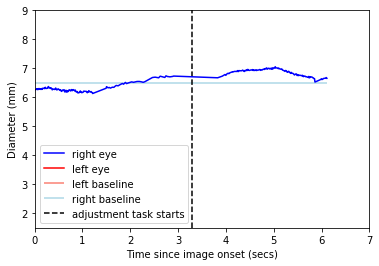

Processing trial 36.0 out of 85
45 bad samples removed out of 546 8.241758241758241%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


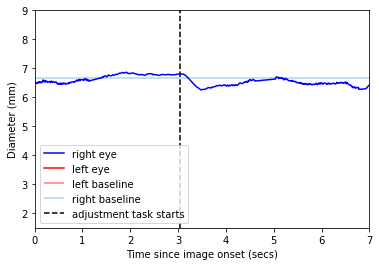

Processing trial 37.0 out of 85
17 bad samples removed out of 261 6.513409961685824%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


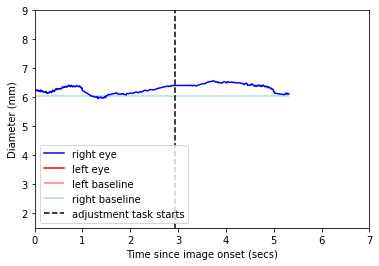

Processing trial 38.0 out of 85
10 bad samples removed out of 426 2.3474178403755865%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


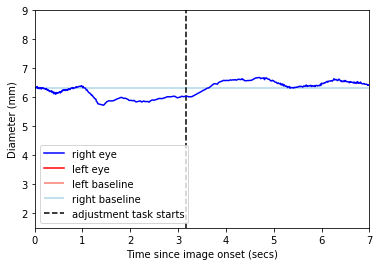

Processing trial 39.0 out of 85
5 bad samples removed out of 211 2.3696682464454977%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


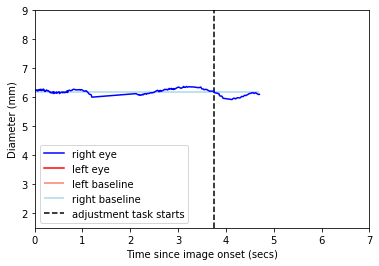

Processing trial 40.0 out of 85
22 bad samples removed out of 286 7.6923076923076925%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


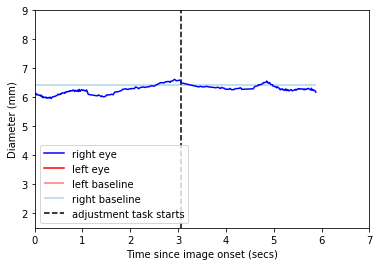

Processing trial 41.0 out of 85
49 bad samples removed out of 491 9.979633401221996%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


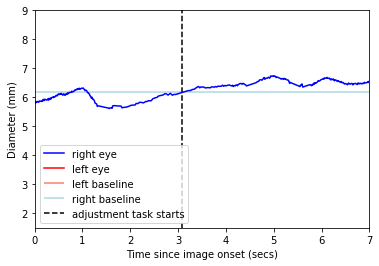

Processing trial 42.0 out of 85
31 bad samples removed out of 312 9.935897435897436%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


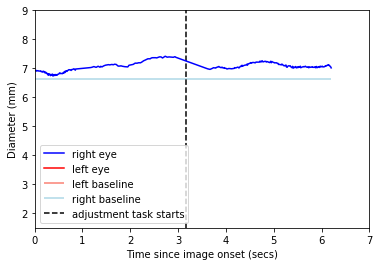

Processing trial 43.0 out of 85
60 bad samples removed out of 357 16.80672268907563%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


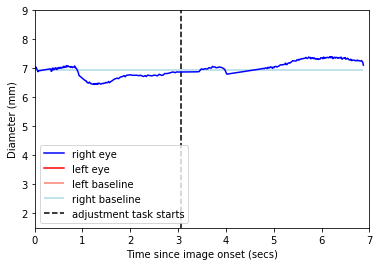

Processing trial 44.0 out of 85
49 bad samples removed out of 506 9.683794466403162%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


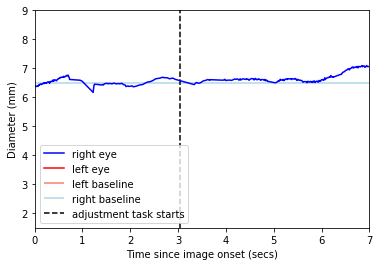

Processing trial 45.0 out of 85
51 bad samples removed out of 316 16.139240506329113%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


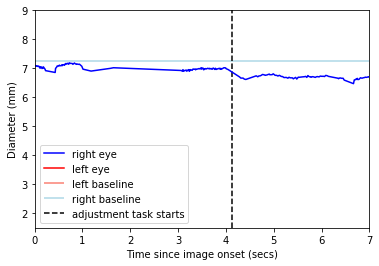

Processing trial 46.0 out of 85
24 bad samples removed out of 347 6.9164265129683%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


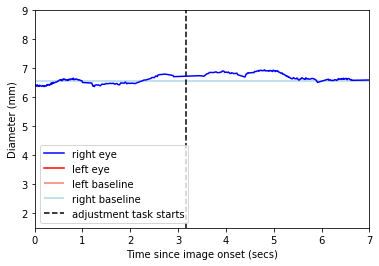

Processing trial 47.0 out of 85
14 bad samples removed out of 311 4.501607717041801%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


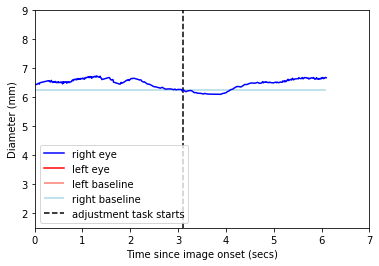

Processing trial 48.0 out of 85
38 bad samples removed out of 527 7.2106261859582546%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


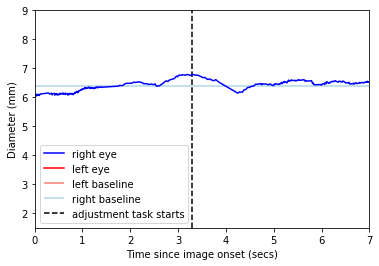

Processing trial 49.0 out of 85
25 bad samples removed out of 439 5.694760820045558%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


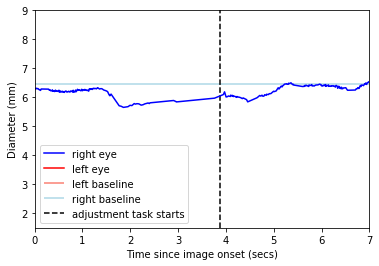

Processing trial 50.0 out of 85
33 bad samples removed out of 511 6.457925636007827%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


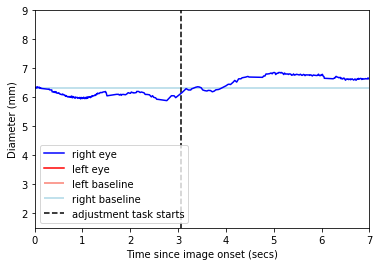

Processing trial 51.0 out of 85
35 bad samples removed out of 432 8.101851851851851%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


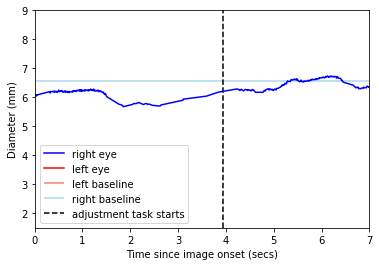

Processing trial 52.0 out of 85
26 bad samples removed out of 372 6.989247311827956%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


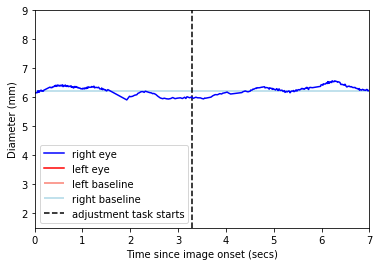

Processing trial 53.0 out of 85
27 bad samples removed out of 347 7.780979827089338%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


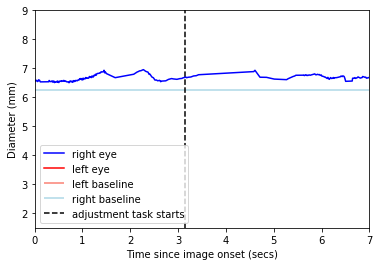

Processing trial 54.0 out of 85
8 bad samples removed out of 339 2.359882005899705%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


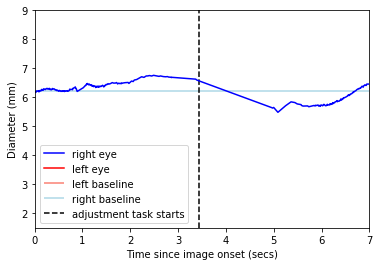

Processing trial 55.0 out of 85
43 bad samples removed out of 369 11.653116531165312%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


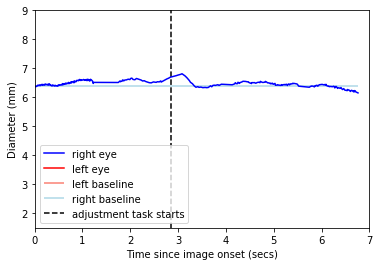

Processing trial 56.0 out of 85
13 bad samples removed out of 240 5.416666666666667%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


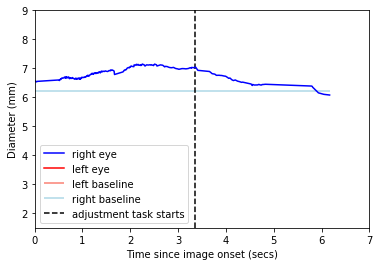

Processing trial 57.0 out of 85
34 bad samples removed out of 732 4.644808743169399%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


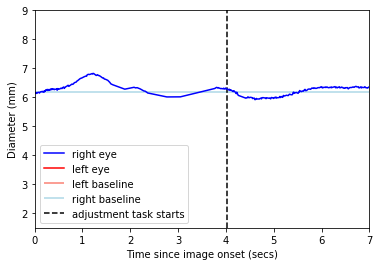

Processing trial 58.0 out of 85
35 bad samples removed out of 442 7.918552036199094%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


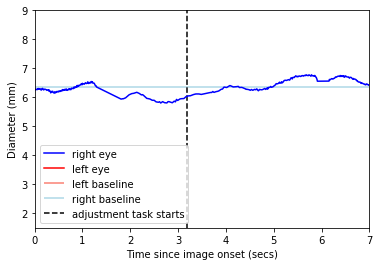

Processing trial 59.0 out of 85
26 bad samples removed out of 181 14.3646408839779%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


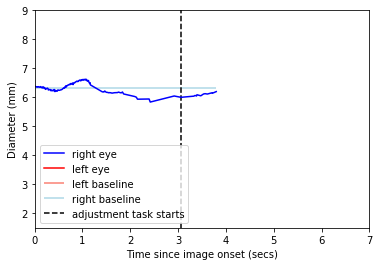

Processing trial 60.0 out of 85
22 bad samples removed out of 395 5.5696202531645564%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


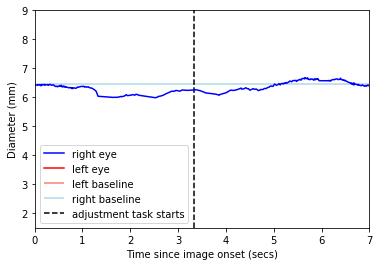

Processing trial 61.0 out of 85
16 bad samples removed out of 263 6.083650190114068%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


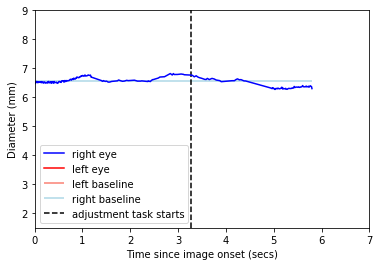

Processing trial 62.0 out of 85
43 bad samples removed out of 316 13.60759493670886%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


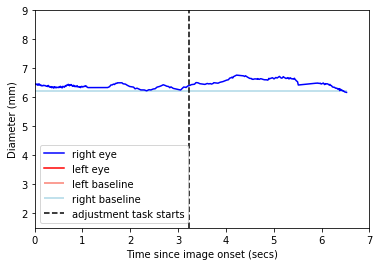

Processing trial 63.0 out of 85
22 bad samples removed out of 452 4.867256637168142%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


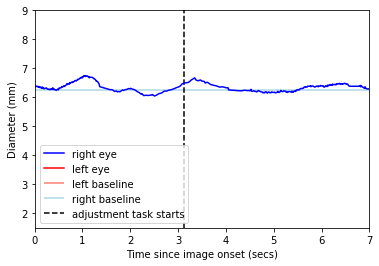

Processing trial 64.0 out of 85
25 bad samples removed out of 350 7.142857142857142%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


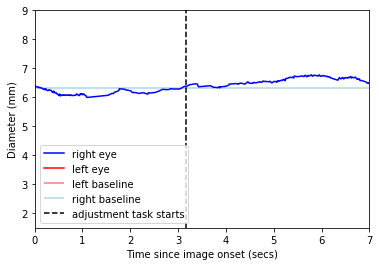

Processing trial 65.0 out of 85
22 bad samples removed out of 262 8.396946564885496%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


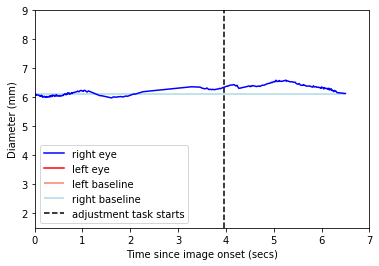

Processing trial 66.0 out of 85
21 bad samples removed out of 359 5.8495821727019495%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


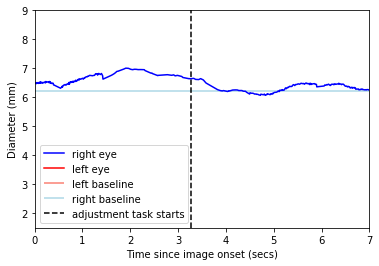

Processing trial 67.0 out of 85
28 bad samples removed out of 417 6.71462829736211%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


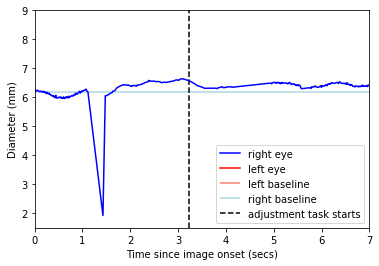

Processing trial 68.0 out of 85
13 bad samples removed out of 320 4.0625%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


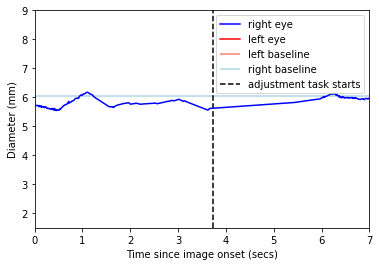

Processing trial 69.0 out of 85
18 bad samples removed out of 211 8.530805687203792%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


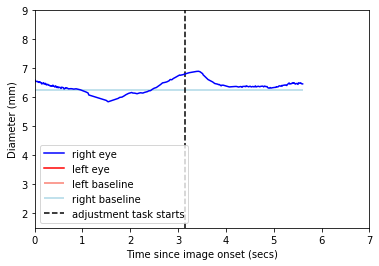

Processing trial 70.0 out of 85
32 bad samples removed out of 243 13.168724279835391%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


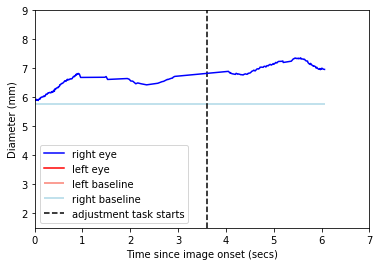

Processing trial 71.0 out of 85
20 bad samples removed out of 287 6.968641114982578%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


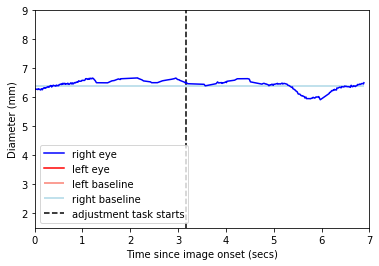

Processing trial 72.0 out of 85
18 bad samples removed out of 301 5.980066445182724%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


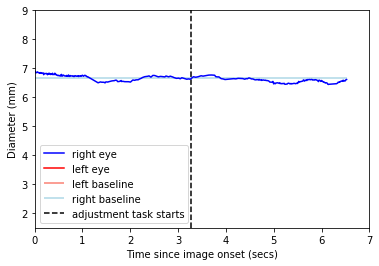

Processing trial 73.0 out of 85
12 bad samples removed out of 180 6.666666666666667%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


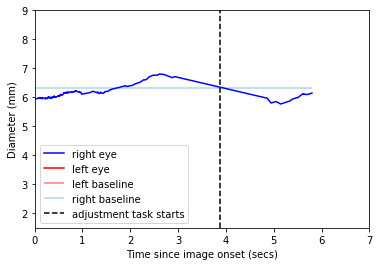

Processing trial 74.0 out of 85
16 bad samples removed out of 263 6.083650190114068%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


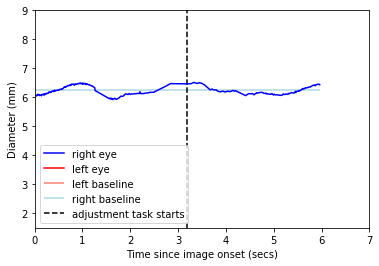

Processing trial 75.0 out of 85
23 bad samples removed out of 333 6.906906906906906%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


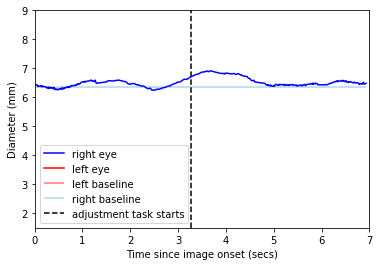

Processing trial 76.0 out of 85
31 bad samples removed out of 388 7.989690721649484%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


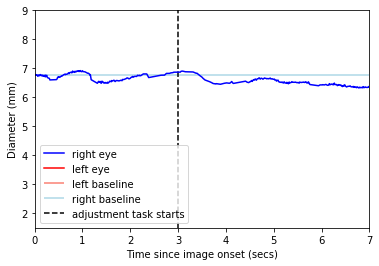

Processing trial 77.0 out of 85
28 bad samples removed out of 417 6.71462829736211%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


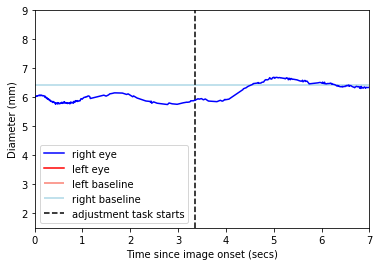

Processing trial 78.0 out of 85
40 bad samples removed out of 587 6.814310051107325%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


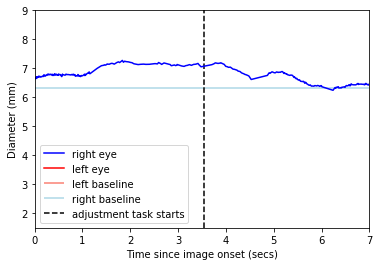

Processing trial 79.0 out of 85
16 bad samples removed out of 236 6.779661016949152%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


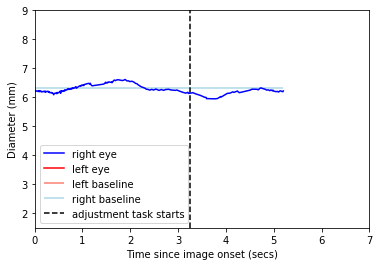

Processing trial 80.0 out of 85
26 bad samples removed out of 371 7.008086253369273%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


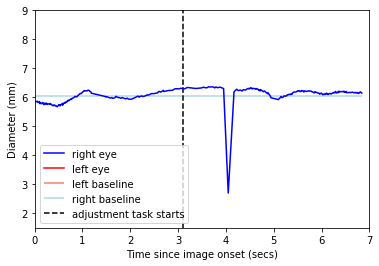

Processing trial 81.0 out of 85
29 bad samples removed out of 307 9.446254071661238%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


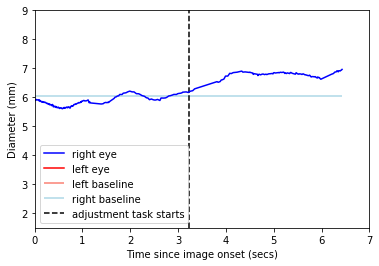

Processing trial 82.0 out of 85
16 bad samples removed out of 362 4.41988950276243%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


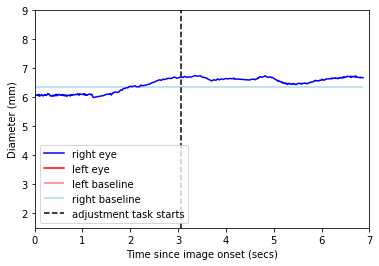

Processing trial 83.0 out of 85
21 bad samples removed out of 365 5.7534246575342465%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


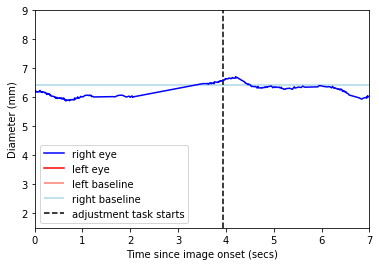

Processing trial 84.0 out of 85
19 bad samples removed out of 309 6.148867313915858%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


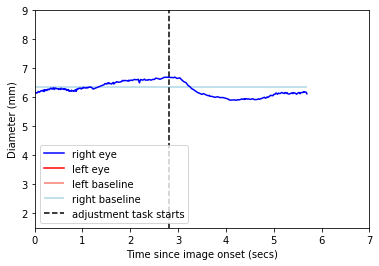

Processing block 3.0 out of 4
Processing trial 1.0 out of 85
8 bad samples removed out of 302 2.6490066225165565%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


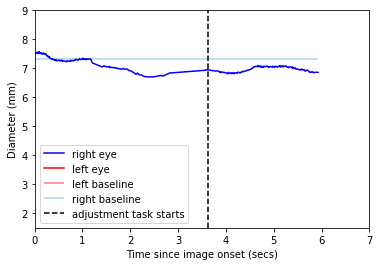

Processing trial 2.0 out of 85
8 bad samples removed out of 263 3.041825095057034%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


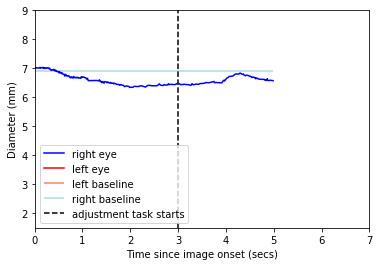

Processing trial 3.0 out of 85
15 bad samples removed out of 389 3.8560411311053984%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


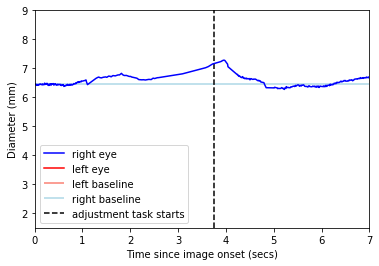

Processing trial 4.0 out of 85
16 bad samples removed out of 250 6.4%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


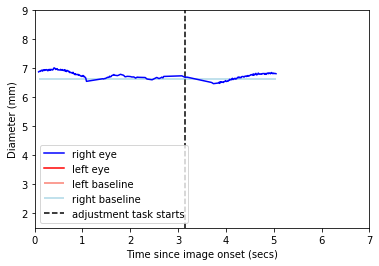

Processing trial 5.0 out of 85
18 bad samples removed out of 228 7.894736842105263%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


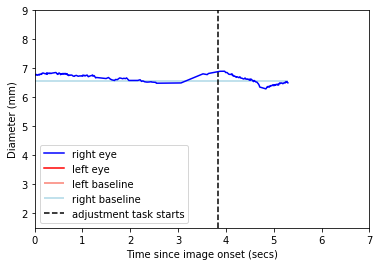

Processing trial 6.0 out of 85
13 bad samples removed out of 352 3.6931818181818183%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


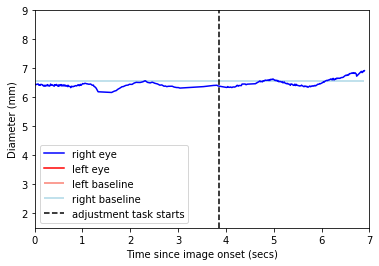

Processing trial 7.0 out of 85
23 bad samples removed out of 516 4.457364341085271%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


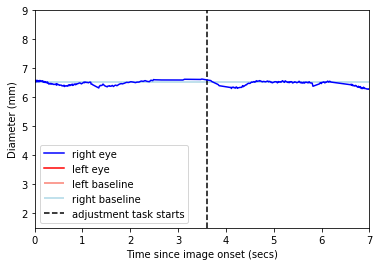

Processing trial 8.0 out of 85
11 bad samples removed out of 130 8.461538461538462%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


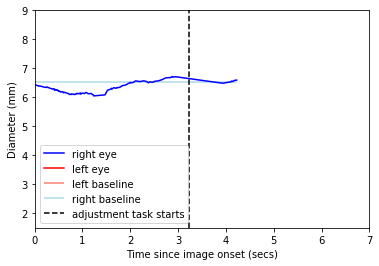

Processing trial 9.0 out of 85
7 bad samples removed out of 287 2.4390243902439024%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


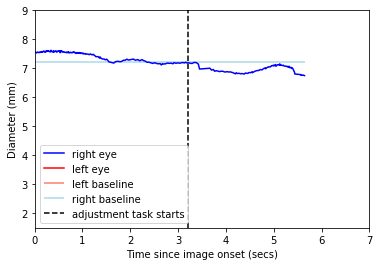

Processing trial 10.0 out of 85
9 bad samples removed out of 231 3.896103896103896%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


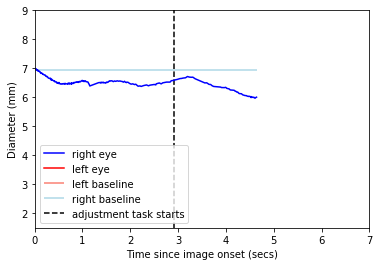

Processing trial 11.0 out of 85
3 bad samples removed out of 378 0.7936507936507936%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


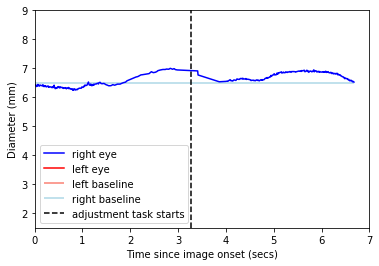

Processing trial 12.0 out of 85
54 bad samples removed out of 593 9.106239460370995%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


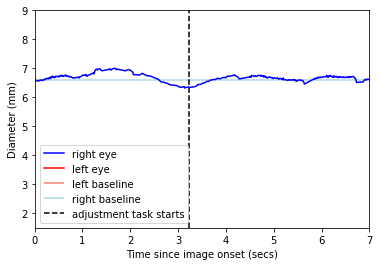

Processing trial 13.0 out of 85
23 bad samples removed out of 329 6.990881458966565%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


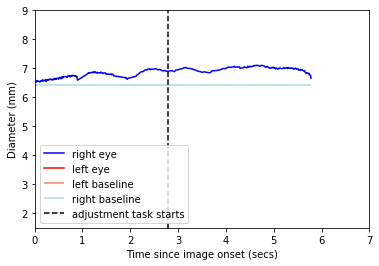

Processing trial 14.0 out of 85
15 bad samples removed out of 406 3.6945812807881775%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


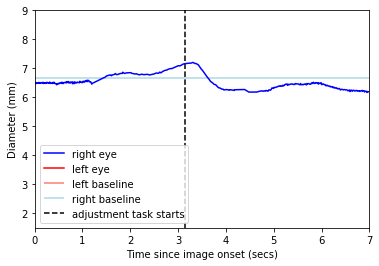

Processing trial 15.0 out of 85
20 bad samples removed out of 399 5.012531328320802%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


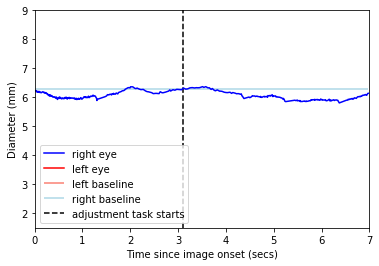

Processing trial 16.0 out of 85
24 bad samples removed out of 406 5.911330049261084%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


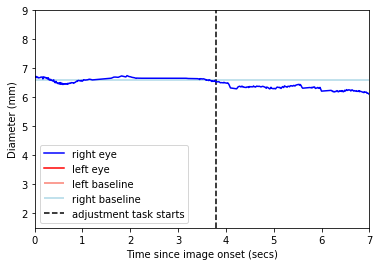

Processing trial 17.0 out of 85
14 bad samples removed out of 238 5.88235294117647%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


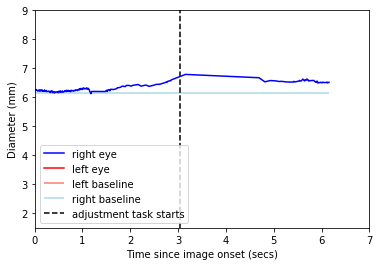

Processing trial 18.0 out of 85
19 bad samples removed out of 347 5.475504322766571%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


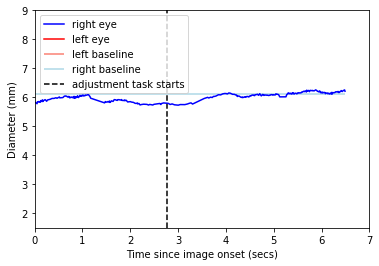

Processing trial 19.0 out of 85
23 bad samples removed out of 507 4.536489151873767%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


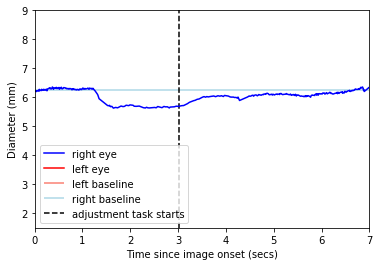

Processing trial 20.0 out of 85
18 bad samples removed out of 373 4.825737265415549%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


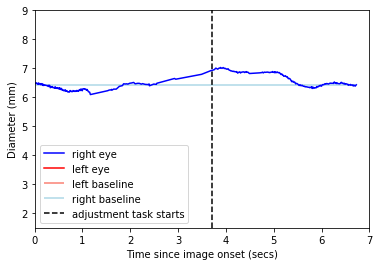

Processing trial 21.0 out of 85
38 bad samples removed out of 559 6.797853309481217%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


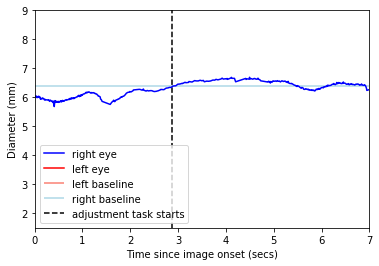

Processing trial 22.0 out of 85
41 bad samples removed out of 383 10.704960835509137%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


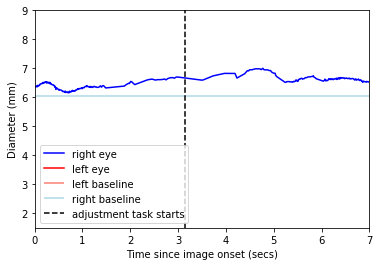

Processing trial 23.0 out of 85
27 bad samples removed out of 443 6.094808126410835%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


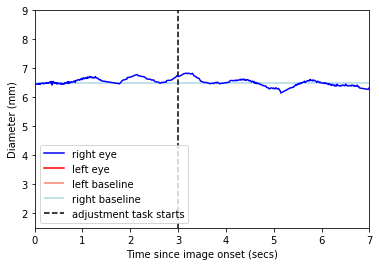

Processing trial 24.0 out of 85
19 bad samples removed out of 280 6.785714285714286%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


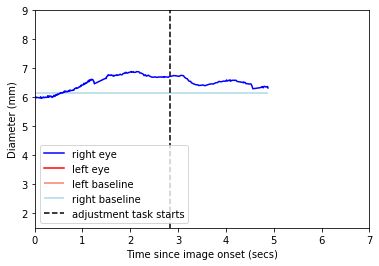

Processing trial 25.0 out of 85
28 bad samples removed out of 501 5.588822355289421%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


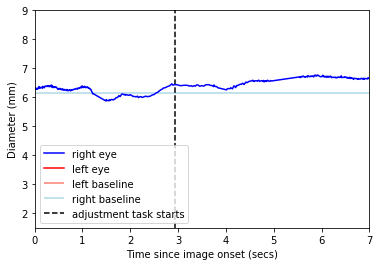

Processing trial 26.0 out of 85
14 bad samples removed out of 284 4.929577464788732%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


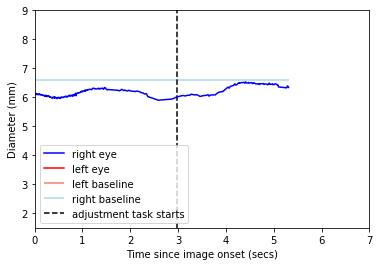

Processing trial 27.0 out of 85
31 bad samples removed out of 626 4.952076677316294%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


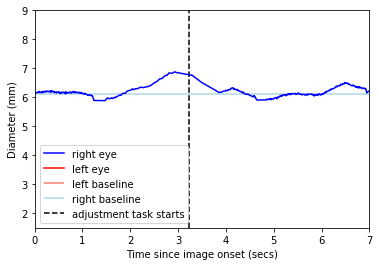

Processing trial 28.0 out of 85
33 bad samples removed out of 309 10.679611650485436%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


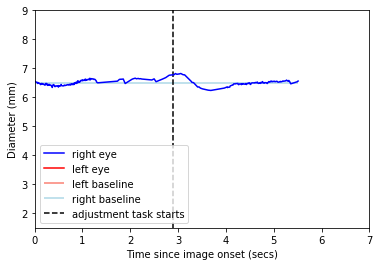

Processing trial 29.0 out of 85
21 bad samples removed out of 384 5.46875%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


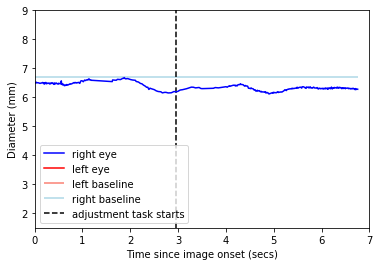

Processing trial 30.0 out of 85
11 bad samples removed out of 240 4.583333333333333%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


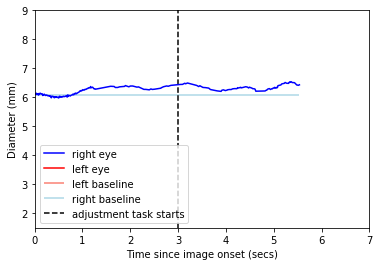

Processing trial 31.0 out of 85
23 bad samples removed out of 227 10.13215859030837%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


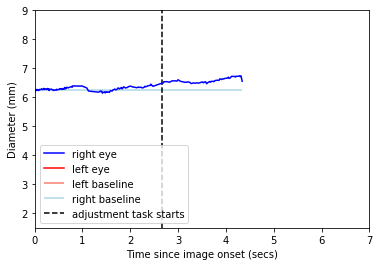

Processing trial 32.0 out of 85
44 bad samples removed out of 287 15.33101045296167%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


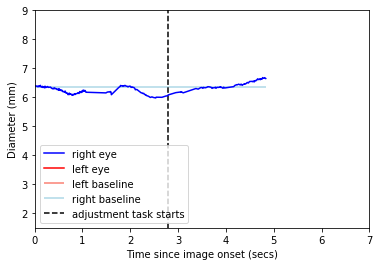

Processing trial 33.0 out of 85
33 bad samples removed out of 245 13.46938775510204%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


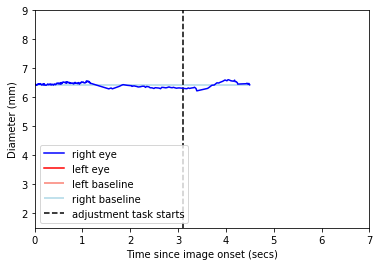

Processing trial 34.0 out of 85
32 bad samples removed out of 375 8.533333333333333%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


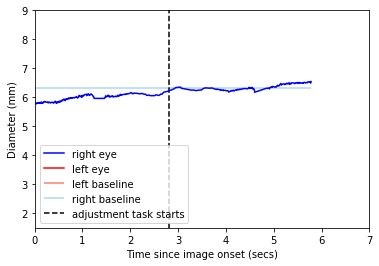

Processing trial 35.0 out of 85
16 bad samples removed out of 260 6.153846153846154%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


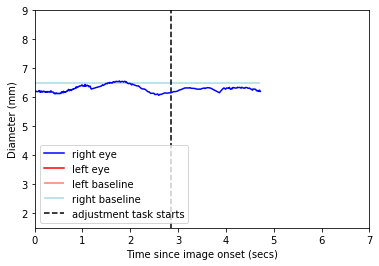

Processing trial 36.0 out of 85
27 bad samples removed out of 402 6.7164179104477615%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


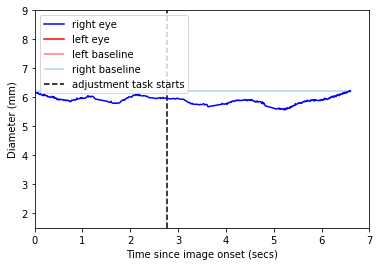

Processing trial 37.0 out of 85
28 bad samples removed out of 363 7.7134986225895315%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


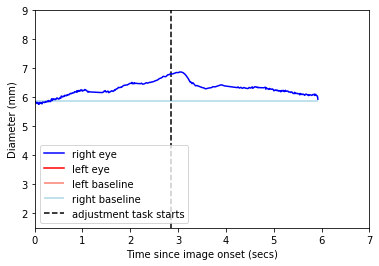

Processing trial 38.0 out of 85
10 bad samples removed out of 257 3.8910505836575875%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


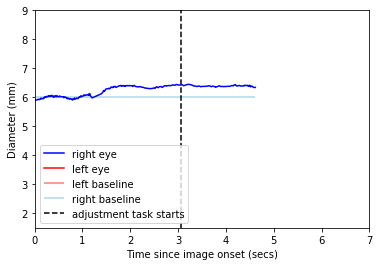

Processing trial 39.0 out of 85
82 bad samples removed out of 649 12.63482280431433%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


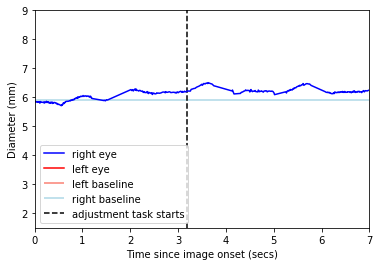

Processing trial 40.0 out of 85
49 bad samples removed out of 532 9.210526315789473%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


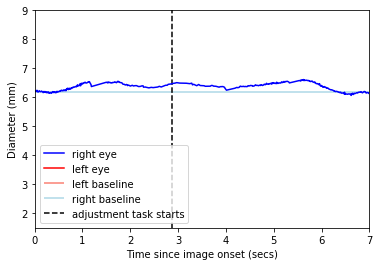

Processing trial 41.0 out of 85
34 bad samples removed out of 352 9.659090909090908%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


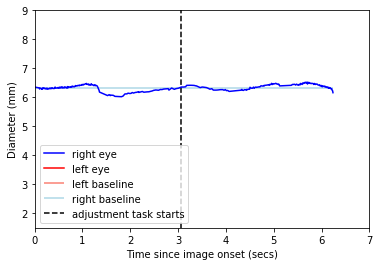

Processing trial 42.0 out of 85
38 bad samples removed out of 464 8.189655172413794%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


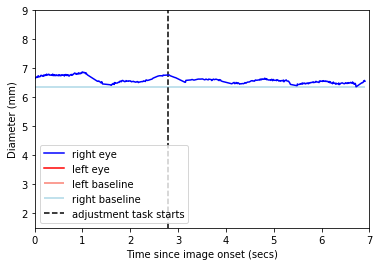

Processing trial 43.0 out of 85
27 bad samples removed out of 404 6.683168316831684%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


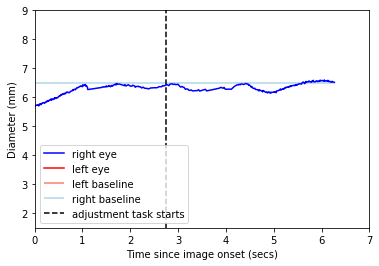

Processing trial 44.0 out of 85
35 bad samples removed out of 356 9.831460674157304%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


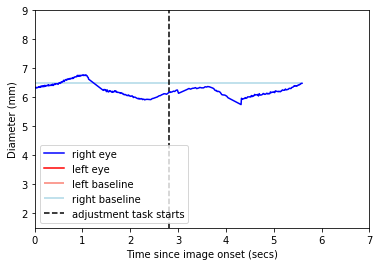

Processing trial 45.0 out of 85
33 bad samples removed out of 335 9.850746268656717%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


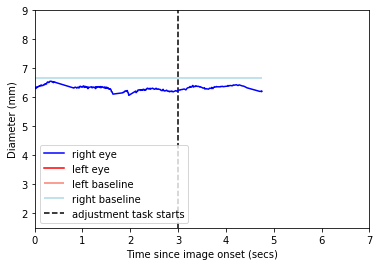

Processing trial 46.0 out of 85
31 bad samples removed out of 489 6.339468302658487%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


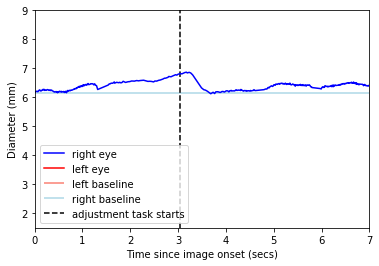

Processing trial 47.0 out of 85
27 bad samples removed out of 440 6.136363636363637%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


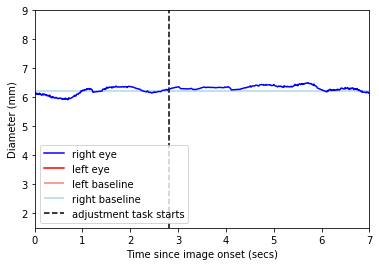

Processing trial 48.0 out of 85
72 bad samples removed out of 962 7.484407484407485%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


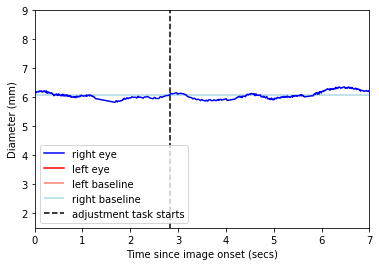

Processing trial 49.0 out of 85
34 bad samples removed out of 267 12.734082397003746%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


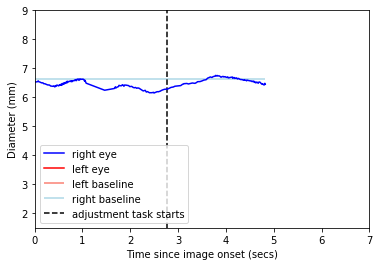

Processing trial 50.0 out of 85
43 bad samples removed out of 534 8.05243445692884%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


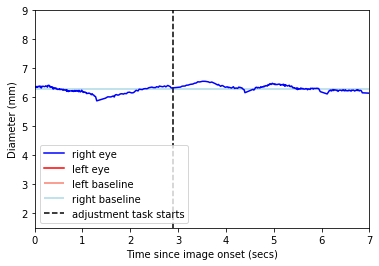

Processing trial 51.0 out of 85
30 bad samples removed out of 395 7.59493670886076%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


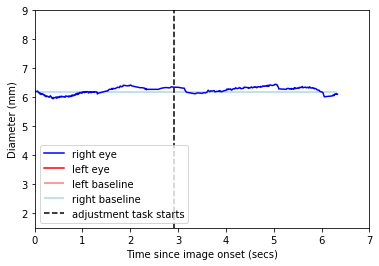

Processing trial 52.0 out of 85
19 bad samples removed out of 383 4.960835509138381%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


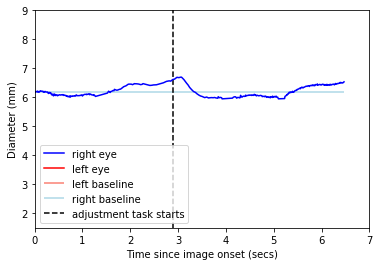

Processing trial 53.0 out of 85
35 bad samples removed out of 469 7.462686567164178%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


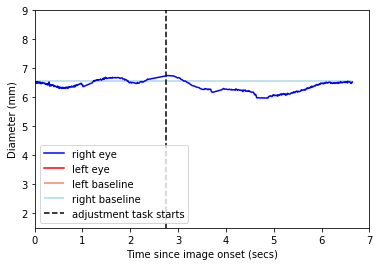

Processing trial 54.0 out of 85
16 bad samples removed out of 334 4.790419161676647%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


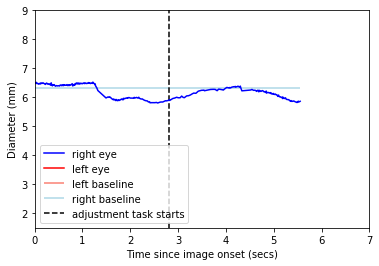

Processing trial 55.0 out of 85
38 bad samples removed out of 495 7.6767676767676765%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


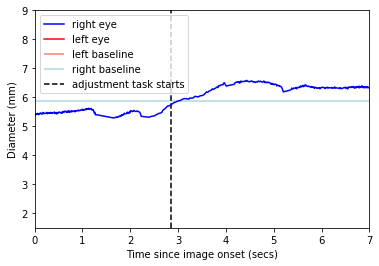

Processing trial 56.0 out of 85
28 bad samples removed out of 492 5.691056910569105%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


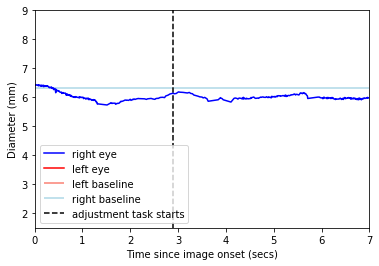

Processing trial 57.0 out of 85
23 bad samples removed out of 313 7.348242811501597%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


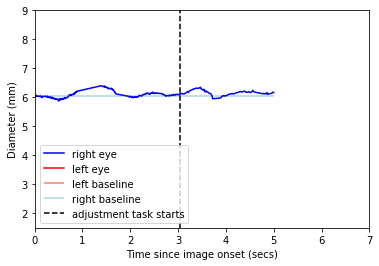

Processing trial 58.0 out of 85
33 bad samples removed out of 319 10.344827586206897%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


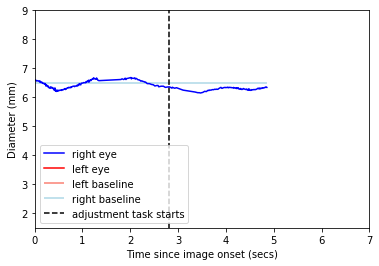

Processing trial 59.0 out of 85
28 bad samples removed out of 329 8.51063829787234%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


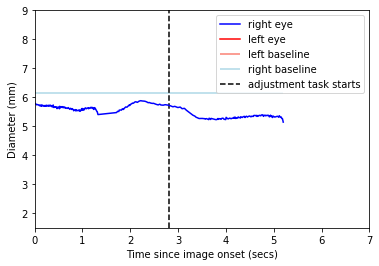

Processing trial 60.0 out of 85
54 bad samples removed out of 548 9.854014598540147%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


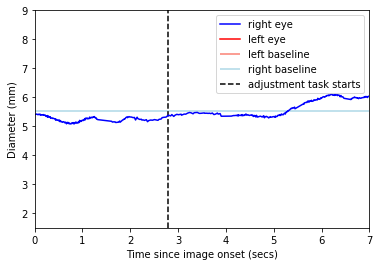

Processing trial 61.0 out of 85
11 bad samples removed out of 240 4.583333333333333%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


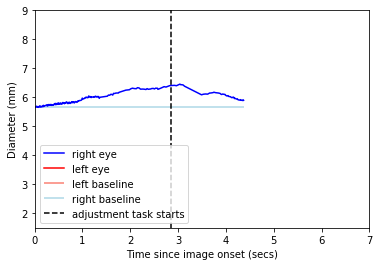

Processing trial 62.0 out of 85
23 bad samples removed out of 327 7.033639143730887%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


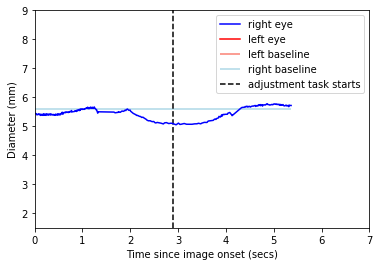

Processing trial 63.0 out of 85
21 bad samples removed out of 315 6.666666666666667%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


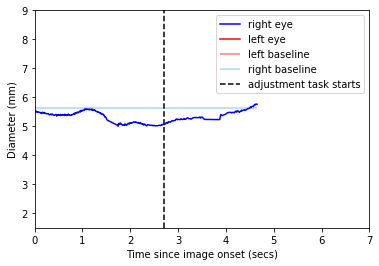

Processing trial 64.0 out of 85
53 bad samples removed out of 488 10.860655737704917%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


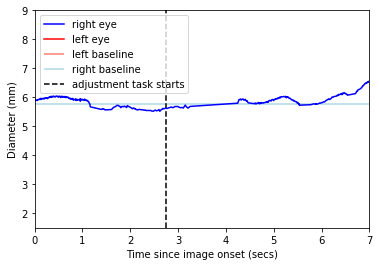

Processing trial 65.0 out of 85
18 bad samples removed out of 286 6.293706293706294%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


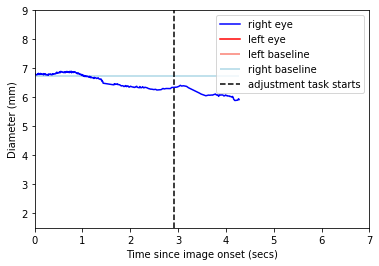

Processing trial 66.0 out of 85
38 bad samples removed out of 530 7.169811320754717%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


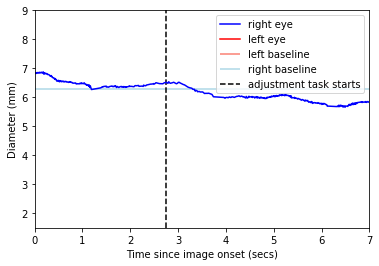

Processing trial 67.0 out of 85
34 bad samples removed out of 255 13.333333333333334%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


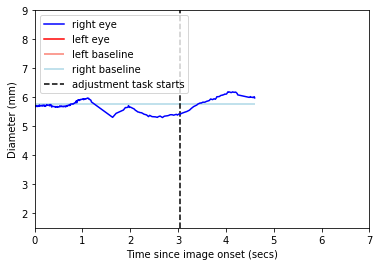

Processing trial 68.0 out of 85
26 bad samples removed out of 336 7.738095238095238%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


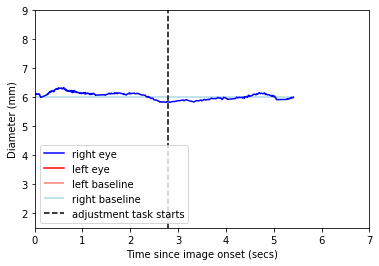

Processing trial 69.0 out of 85
33 bad samples removed out of 489 6.748466257668712%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


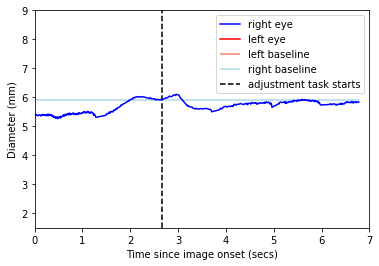

Processing trial 70.0 out of 85
32 bad samples removed out of 373 8.579088471849866%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


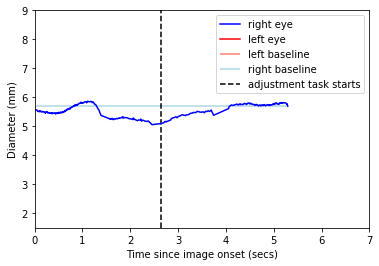

Processing trial 71.0 out of 85
56 bad samples removed out of 912 6.140350877192982%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


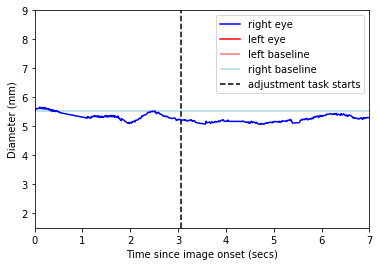

Processing trial 72.0 out of 85
61 bad samples removed out of 596 10.234899328859061%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


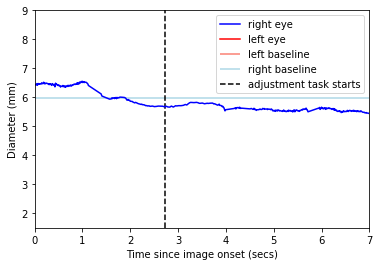

Processing trial 73.0 out of 85
42 bad samples removed out of 515 8.155339805825243%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


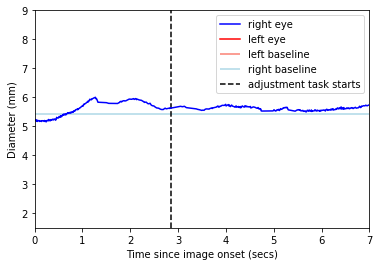

Processing trial 74.0 out of 85
13 bad samples removed out of 335 3.880597014925373%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


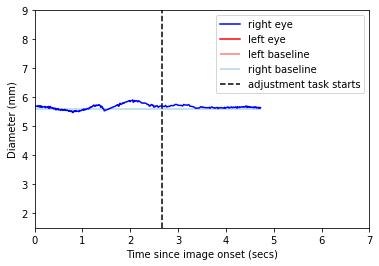

Processing trial 75.0 out of 85
16 bad samples removed out of 331 4.833836858006042%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


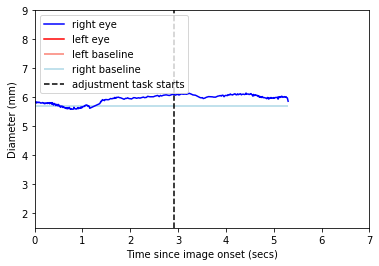

Processing trial 76.0 out of 85
13 bad samples removed out of 281 4.6263345195729535%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


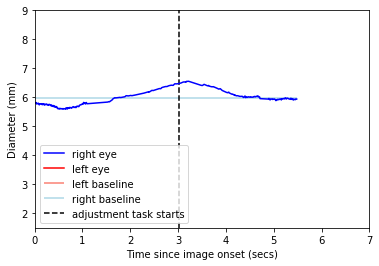

Processing trial 77.0 out of 85
23 bad samples removed out of 325 7.076923076923077%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


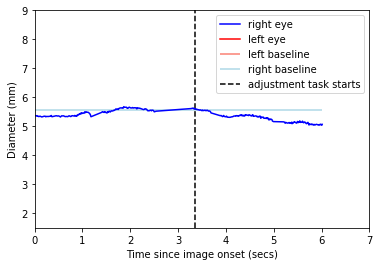

Processing trial 78.0 out of 85
23 bad samples removed out of 437 5.263157894736842%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


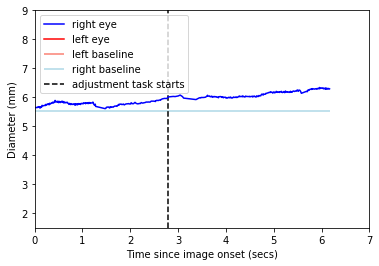

Processing trial 79.0 out of 85
43 bad samples removed out of 508 8.46456692913386%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


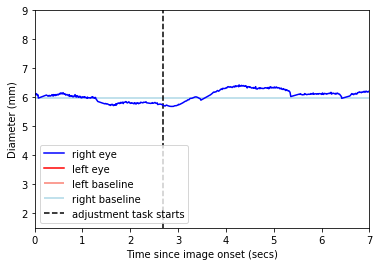

Processing trial 80.0 out of 85
25 bad samples removed out of 486 5.1440329218107%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


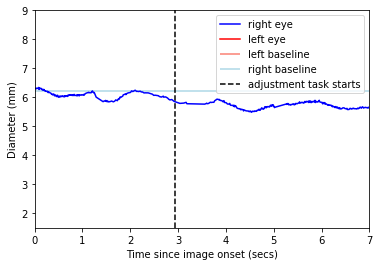

Processing trial 81.0 out of 85
27 bad samples removed out of 409 6.601466992665037%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


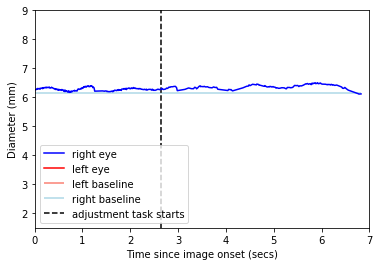

Processing trial 82.0 out of 85
48 bad samples removed out of 822 5.839416058394161%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


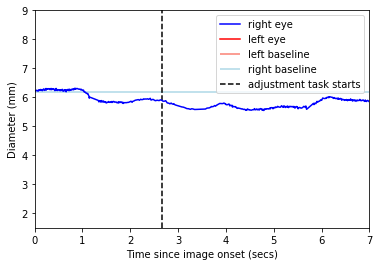

Processing trial 83.0 out of 85
27 bad samples removed out of 279 9.67741935483871%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


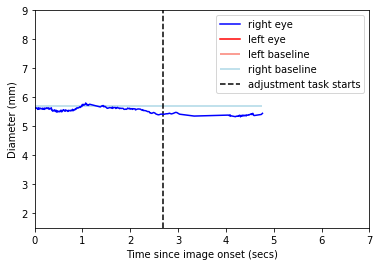

Processing trial 84.0 out of 85
55 bad samples removed out of 448 12.276785714285714%


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


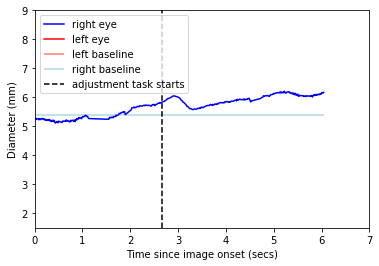

In [39]:
tot_trial = 0
row = 0
for block in block_unique:
    if not np.isnan(block):
        print('Processing block ' + str(block) + ' out of ' + str(len(block_unique)))

        for trial_number in trial_unique:
            if not np.isnan(trial_number):
                print('Processing trial ' + str(trial_number) + ' out of ' + str(len(trial_unique)))
                
                # get timestamps of trial events
                trial_beg_ts = annotation_data[(annotation_data['block'] == str(int(block))) & (annotation_data['trial'] == str(int(trial_number))) & (annotation_data['task'] == 'Trial begins')]['timestamp'].reset_index(drop=True)[0]

                trial_imOnset_ts = annotation_data[(annotation_data['block'] == str(int(block))) & (annotation_data['trial'] == str(int(trial_number))) & (annotation_data['task'] == 'Image onset')]['timestamp'].reset_index(drop=True)[0]
                trial_end_ts = annotation_data[(annotation_data['block'] == str(int(block))) & (annotation_data['trial'] == str(int(trial_number))) & (annotation_data['task'] == 'End trial')]['timestamp'].reset_index(drop=True)[0]
                trial_fix_beg_ts = annotation_data[(annotation_data['block'] == str(int(block))) & (annotation_data['trial'] == str(int(trial_number))) & (annotation_data['task'] == 'Fixation dot')]['timestamp'].reset_index(drop=True)[0]
                trial_fix_end_ts = trial_imOnset_ts
                trial_adjustment_ts = annotation_data[(annotation_data['block'] == str(int(block))) & (annotation_data['trial'] == str(int(trial_number))) & (annotation_data['task'] == 'Adjust task')]['timestamp'].reset_index(drop=True)[0]
                trial_adjustment_ts_corrected = trial_adjustment_ts - trial_imOnset_ts
                trial_fixation = df_diameter[(df_diameter['timestamp'] >= trial_fix_beg_ts) & (df_diameter['timestamp'] <= trial_fix_end_ts)]
                trial = df_diameter[(df_diameter['timestamp'] >= trial_imOnset_ts) & (df_diameter['timestamp'] <= trial_end_ts)]
                
                if not trial.empty:
                    # add info:
                    df_diameter.loc[(df_diameter['timestamp'] >= trial_imOnset_ts) & (df_diameter['timestamp'] <= trial_end_ts), 'TRIAL'] = trial_number
                    df_diameter.loc[(df_diameter['timestamp'] >= trial_imOnset_ts) & (df_diameter['timestamp'] <= trial_end_ts), 'BLOCK'] = block


#                     df_diameter.loc[(df_diameter['timestamp'] >= trial_imOnset_ts) & (df_diameter['timestamp'] <= trial_end_ts), 'TIMESTAMP_CORRECTED'] = df_diameter[(df_diameter['timestamp'] >= trial_imOnset_ts) & (df_diameter['timestamp'] <= trial_end_ts)] - trial_imOnset_ts
                    # clean data
                    trial_cleaned = trial[(trial['confidence'] >= min_confidence) &
                           (trial['diameter_3d [mm]'] >= min_diameter) &
                           (trial['diameter_3d [mm]'] <= max_diameter)]
                    trial_fixation_cleaned = trial_fixation[(trial_fixation['confidence'] >= min_confidence) &
                           (trial_fixation['diameter_3d [mm]'] >= min_diameter) &
                           (trial_fixation['diameter_3d [mm]'] <= max_diameter)]
                    bad_samples = len(trial) - len(trial_cleaned)
                    bad_samples_perc = (bad_samples/len(trial))*100
                    print(str(bad_samples) + ' bad samples removed out of ' + str(len(trial)) + ' ' + str(bad_samples_perc) + '%')

                    trial_cleaned['timestamp_corrected'] = trial_cleaned['timestamp'] - trial_imOnset_ts

                    eye_1_cleaned = trial_cleaned.loc[trial_cleaned['eye_id'] == 1]
                    eye_0_cleaned = trial_cleaned.loc[trial_cleaned['eye_id'] == 0]
                    minimum_cleaned = np.min(trial_cleaned['timestamp_corrected'])
                    maximum_cleaned = np.max(trial_cleaned['timestamp_corrected'])

                    eye_1_fix_cleaned = np.median(trial_fixation_cleaned.loc[trial_fixation_cleaned['eye_id'] == 1]['diameter_3d [mm]'])
                    eye_0_fix_cleaned = np.median(trial_fixation_cleaned.loc[trial_fixation_cleaned['eye_id'] == 0]['diameter_3d [mm]'])

                    plt.plot(eye_1_cleaned['timestamp_corrected'], eye_1_cleaned['diameter_3d [mm]'], color='blue', label = 'right eye')
                    plt.plot(eye_0_cleaned['timestamp_corrected'], eye_0_cleaned['diameter_3d [mm]'], color='red', label = 'left eye')

                    plt.hlines(eye_0_fix_cleaned, minimum_cleaned, maximum_cleaned, color='salmon', label='left baseline')
                    plt.hlines(eye_1_fix_cleaned, minimum_cleaned, maximum_cleaned, color='lightblue', label='right baseline')
                    plt.vlines(trial_adjustment_ts_corrected, 1.5, 9, color='k', linestyle='--', label = 'adjustment task starts')
                    plt.xlabel('Time since image onset (secs)')
                    plt.ylabel('Diameter (mm)')
                    plt.ylim([1.5, 9])
                    plt.xlim([0, 7])
                    plt.legend()
                    plt.show()

# Behavioral data

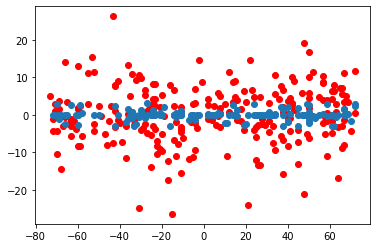

In [40]:
plt.plot(behavioral_data['Stim_diff'], behavioral_data['responseError'], marker='o', linestyle='none', color='red')
plt.plot(behavioral_data['Stim_diff'], behavioral_data['DoVM'], marker='o', linestyle='none')

For a trial to have SD, it has to either:
1) have Stim_diff < 0 and responseError < 0
2) have Stim_diff > 0 and responseError > 0

## tag trials with sd

In [41]:
trial_sd = pd.DataFrame()
row = 0
for block in block_unique:
    if not np.isnan(block):

        print('Processing block ' + str(block) + ' out of ' + str(len(block_unique)))

        for trial in trial_unique:
            if not np.isnan(trial):

                print(trial)

                trial_data = behavioral_data[(behavioral_data['blockNumber'] == block) & (behavioral_data['trialNumber'] == trial)].reset_index(drop=True)
                
                if not trial_data.empty:
                    if (trial_data.loc[0,'Stim_diff'] < 0) & (trial_data.loc[0,'responseError'] < 0): 

                        trial_sd.loc[row, 'BLOCK'] = block
                        trial_sd.loc[row, 'TRIAL'] = trial
                        trial_sd.loc[row, 'SD_CONDITION'] = 1
                        
                        
                        df_diameter.loc[df_diameter['TRIAL'] == trial, 'SD_CONDITION'] = 1

                        row += 1

                    elif (trial_data.loc[0, 'Stim_diff'] > 0) & (trial_data.loc[0,'responseError'] > 0):
                        trial_sd.loc[row, 'BLOCK'] = block
                        trial_sd.loc[row, 'TRIAL'] = trial
                        trial_sd.loc[row, 'SD_CONDITION'] = 1
                        
                        df_diameter.loc[df_diameter['TRIAL'] == trial, 'SD_CONDITION'] = 1
                        
                        row += 1
                    else:

                        trial_sd.loc[row, 'BLOCK'] = block
                        trial_sd.loc[row, 'TRIAL'] = trial
                        trial_sd.loc[row, 'SD_CONDITION'] = 0   
                        
                        df_diameter.loc[df_diameter['TRIAL'] == trial, 'SD_CONDITION'] = 0

                        row += 1




Processing block 1.0 out of 4
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
Processing block 2.0 out of 4
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
Processing block 3.0 out of 4
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20

In [42]:
df_diameter_nonan = df_diameter.dropna()

In [43]:
eye_1 = df_diameter_nonan[df_diameter_nonan['eye_id'] == 1]

# Organize data


In [54]:
def initial_clean(df, annotations_df, min_confidence = 0.8, min_diameter = 1.5, max_diameter = 9):
    df_cleaned = df[(df['confidence'] >= min_confidence) &
                    (df['diameter_3d [mm]'] >= min_diameter) &
                    (df['diameter_3d [mm]'] <= max_diameter)]
    
    exp_begins_ts = annotations_df[annotations_df['exp_event'] == 'Block 1 Begins']['timestamp'].reset_index(drop=True)[0]
    exp_ends_ts = annotations_df[annotations_df['exp_event'] == 'Block 3 Ends']['timestamp'].reset_index(drop=True)[0]
    
    perc_trials_bad_confidence = (len(df[df['confidence'] < min_confidence])/len(df))*100
    print(str(round(perc_trials_bad_confidence, 2)) + '% of data excluded because < mininum confidence')
    
    perc_trials_outlier = (len(df[(df['diameter_3d [mm]'] < min_diameter) & (df['diameter_3d [mm]'] > max_diameter) ])/len(df))*100
    print(str(round(perc_trials_outlier, 2)) + '% of data excluded because of pupil size is out of normal values')

    df_cleaned = df_cleaned[(df_cleaned['timestamp'] > exp_begins_ts) & (df_cleaned['timestamp'] < exp_ends_ts)].reset_index(drop=True)
    
    perc_good_data = (len(df_cleaned)/len(df))*100
    print('Total of ' + str(round(perc_good_data)) + '% of data kept')
    
    return df_cleaned

def correct_timestamps(df, annotations_df, behavioral_df):
    
    trial_unique = behavioral_df.trialNumber.unique()
    block_unique = behavioral_df.blockNumber.unique()
    
    for block in block_unique:
        if not np.isnan(block):

            for trial_number in trial_unique:
                if not np.isnan(trial_number):

                    # get timestamps of trial events
                    trial_beg_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Trial begins')]['timestamp'].reset_index(drop=True)[0]
                    trial_end_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'End trial')]['timestamp'].reset_index(drop=True)[0]
                    
#                     print('start: 'trial_beg_ts)
                    trial_imOnset_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Image onset')]['timestamp'].reset_index(drop=True)[0]
                    trial_fix_beg_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Fixation dot')]['timestamp'].reset_index(drop=True)[0]
                    trial_fix_end_ts = trial_imOnset_ts
                    trial_adjustment_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Adjust task')]['timestamp'].reset_index(drop=True)[0]
                    trial_adjustment_ts_corrected = trial_adjustment_ts - trial_imOnset_ts
                    

                    trial = df[(df['timestamp'] >= trial_beg_ts) & (df['timestamp'] <= trial_end_ts)]
                    trial['TIMESTAMP_CORRECTED'] = trial['timestamp'] - trial_beg_ts
                    # now the timestamp correct is in relation to trial beginning of trial
                    
                    # now lets also have a timestamp in relation to image onset
                    trial['TIMESTAMP_CORRECTED_IMONSET'] = trial['timestamp'] - trial_imOnset_ts
                    
                    df.loc[(df['timestamp'] >= trial_beg_ts) & (df['timestamp'] <= trial_end_ts), 'TIMESTAMP_CORRECT'] = trial['TIMESTAMP_CORRECTED']
                    df.loc[(df['timestamp'] >= trial_beg_ts) & (df['timestamp'] <= trial_end_ts), 'TIMESTAMP_CORRECT_IMONSET'] = trial['TIMESTAMP_CORRECTED_IMONSET']
                   
                    # label trials and blocks in eye movement data
                    df_diameter.loc[(df_diameter['timestamp'] >= trial_beg_ts) & (df_diameter['timestamp'] <= trial_end_ts), 'TRIAL'] = trial_number
                    df_diameter.loc[(df_diameter['timestamp'] >= trial_beg_ts) & (df_diameter['timestamp'] <= trial_end_ts), 'BLOCK'] = block

    return df
    
    
def label_trials_sd(df, behavioral_df):
    
    trial_unique = behavioral_df.trialNumber.unique()
    block_unique = behavioral_df.blockNumber.unique()
    
    trial_sd = pd.DataFrame()
    row = 0
    for block in block_unique:
        if not np.isnan(block):

            print('Processing block ' + str(block) + ' out of ' + str(len(block_unique)))

            for trial in trial_unique:
                if not np.isnan(trial):


                    trial_data = behavioral_df[(behavioral_df['blockNumber'] == block) & (behavioral_df['trialNumber'] == trial)].reset_index(drop=True)

                    if not trial_data.empty:
                        if (trial_data.loc[0,'Stim_diff'] < 0) & (trial_data.loc[0,'responseError'] < 0): 

                            trial_sd.loc[row, 'BLOCK'] = block
                            trial_sd.loc[row, 'TRIAL'] = trial
                            trial_sd.loc[row, 'SD_CONDITION'] = 'SD'


                            df.loc[df['TRIAL'] == trial, 'SD_CONDITION'] = 'SD'

                            row += 1

                        elif (trial_data.loc[0, 'Stim_diff'] > 0) & (trial_data.loc[0,'responseError'] > 0):
                            trial_sd.loc[row, 'BLOCK'] = block
                            trial_sd.loc[row, 'TRIAL'] = trial
                            trial_sd.loc[row, 'SD_CONDITION'] = 'SD'

                            df.loc[df['TRIAL'] == trial, 'SD_CONDITION'] = 'SD'

                            row += 1
                        else:

                            trial_sd.loc[row, 'BLOCK'] = block
                            trial_sd.loc[row, 'TRIAL'] = trial
                            trial_sd.loc[row, 'SD_CONDITION'] = 'NO_SD'   

                            df.loc[df['TRIAL'] == trial, 'SD_CONDITION'] = 'NO_SD'

                            row += 1

    return df, trial_sd

def label_events(df, annotations_df, behavioral_df):
    
    trial_unique = behavioral_df.trialNumber.unique()
    block_unique = behavioral_df.blockNumber.unique()
    
    for block in block_unique:
        if not np.isnan(block):

            for trial_number in trial_unique:
                if not np.isnan(trial_number):

                    # get timestamps of trial events
                    
                    # trial starts & end
                    trial_beg_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Trial begins')]['timestamp'].reset_index(drop=True)[0]
                    trial_end_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'End trial')]['timestamp'].reset_index(drop=True)[0]
                    
                    # fixation starts & end
                    trial_fix_beg_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Fixation dot')]['timestamp'].reset_index(drop=True)[0]
                    trial_fix_end_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Image onset')]['timestamp'].reset_index(drop=True)[0]
 
                    df.loc[(df['timestamp'] >= trial_fix_beg_ts) & (df['timestamp'] < trial_fix_end_ts), 'EVENT'] = 'fixation'

                    # image starts & end
                    trial_imOnset_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Image onset')]['timestamp'].reset_index(drop=True)[0]
                    trial_imOffset_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Adjust task')]['timestamp'].reset_index(drop=True)[0]

                    df.loc[(df['timestamp'] >= trial_imOnset_ts) & (df['timestamp'] < trial_imOffset_ts), 'EVENT'] = 'blob'

                    # adjust starts & end
                    trial_adjust_beg_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'Adjust task')]['timestamp'].reset_index(drop=True)[0]
                    trial_adjust_end_ts = annotations_df[(annotations_df['block'] == str(int(block))) & (annotations_df['trial'] == str(int(trial_number))) & (annotations_df['task'] == 'End trial')]['timestamp'].reset_index(drop=True)[0]

                    df.loc[(df['timestamp'] >= trial_adjust_beg_ts) & (df['timestamp'] < trial_adjust_end_ts), 'EVENT'] = 'adjustment_task'
                    
                    
                    # beg of trial
                    df.loc[(df['timestamp'] >= trial_beg_ts) & (df['timestamp'] < trial_fix_beg_ts), 'EVENT'] = 'trial_start'

                    # end of trial
                    df.loc[(df['timestamp'] >= trial_adjust_end_ts) & (df['timestamp'] < trial_end_ts), 'EVENT'] = 'trial_end'
                    
    return df

In [55]:
def pupil_preprocess(df, annotation_df, behavioral_df):
    
    df_diameter_cleaned = initial_clean(df, annotation_df)
    
    df_diameter_cleaned_ts = correct_timestamps(df_diameter_cleaned, annotation_df, behavioral_df)
    
    df_diameter_cleaned_ts_labeled, trial_sd = label_trials_sd(df_diameter_cleaned_ts, behavioral_df)
    
    df_final = label_events(df_diameter_cleaned_ts_labeled, annotation_df, behavioral_df)
    
    return df_final, trial_sd

In [56]:
df_final, trial_sd = pupil_preprocess(df_diameter, annotation_data, behavioral_data)

11.93% of data excluded because < mininum confidence
0.0% of data excluded because of pupil size is out of normal values
Total of 81% of data kept


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processing block 1.0 out of 4
Processing block 2.0 out of 4
Processing block 3.0 out of 4


# Baseline fixation 

In [57]:
def pupil_baseline(df, behavioral_df):
    
    trial_unique = behavioral_df.trialNumber.unique()
    block_unique = behavioral_df.blockNumber.unique()

    fixation_baseline = pd.DataFrame()

    row=0

    for block in block_unique:
        if not np.isnan(block):

            for trial_number in trial_unique:
                if not np.isnan(trial_number):
                    
                    # get fixation data:
                    trial_data = df[(df['BLOCK'] == block) & (df['TRIAL'] == trial_number) & (df['EVENT'] == 'fixation')]
                    
                    # it seems that for some trial there is no fixation data, then grab it from first blob diameter:
                    

                    mean_fix, ci_low_fix, ci_up_fix = mean_confidence_interval.mean_sem(trial_data['diameter_3d [mm]'])

                    fixation_baseline.loc[row, 'BLOCK'] = block
                    fixation_baseline.loc[row, 'TRIAL'] = trial_number
                    fixation_baseline.loc[row, 'MEAN_PS'] = mean_fix
                    fixation_baseline.loc[row, 'CI_LOW_PS'] = ci_low_fix
                    fixation_baseline.loc[row, 'CI_UP_PS'] = ci_up_fix

                    row += 1
                    
                    df.loc[(df['BLOCK'] == block) & (df['TRIAL'] == trial_number), 'PS_CORRECTED'] = df.loc[(df['BLOCK'] == block) & (df['TRIAL'] == trial_number), 'diameter_3d [mm]'] - mean_fix
    
    return df, fixation_baseline

In [58]:
df_final, fixation_baseline = pupil_baseline(df_final, behavioral_data)

In [60]:
df_final[(df_final['TRIAL'] == 1) & (df_final['EVENT'] == 'fixation')]

eye_id     timestamp    topic  confidence  diameter_2d [px]  \
6            1  1.591225e+09  pupil.1    0.999362         67.992929   
7            1  1.591225e+09  pupil.1    0.999406         67.873732   
8            1  1.591225e+09  pupil.1    0.999233         67.813587   
9            1  1.591225e+09  pupil.1    0.999758         67.952384   
10           1  1.591225e+09  pupil.1    0.999331         67.972098   
...        ...           ...      ...         ...               ...   
115290       1  1.591227e+09  pupil.1    0.999264         74.597669   
115291       1  1.591227e+09  pupil.1    0.999298         74.773454   
115292       1  1.591227e+09  pupil.1    0.999455         74.535622   
115293       1  1.591227e+09  pupil.1    0.999491         74.597027   
115294       1  1.591227e+09  pupil.1    0.999277         74.619314   

        diameter_3d [mm]  TRIAL  BLOCK SD_CONDITION  TIMESTAMP_CORRECT  \
6               5.975264    1.0    1.0           SD           0.006448   
7               5.965368    1.0    1.0           SD           0.014518   
8               5.960458    1.0    1.0           SD           0.022588   
9               5.973390    1.0    1.0           SD           0.030658   
10              5.975214    1.0    1.0           SD           0.038728   
...                  ...    ...    ...          ...                ...   
115290          7.511684    1.0    3.0           SD           3.029103   
115291          7.529204    1.0    3.0           SD           3.037172   
115292          7.505626    1.0    3.0           SD           3.045241   
115293          7.511426    1.0    3.0           SD           3.061379   
115294          7.513397    1.0    3.0           SD           3.069448   

        TIMESTAMP_CORRECT_IMONSET     EVENT  PS_CORRECTED  
6                       -1.291955  fixation      0.136567  
7                       -1.283885  fixation      0.126672  
8                       -1.275815  fixation      0.121761  
9                       -1.267745  fixation      0.134693  
10                      -1.259675  fixation      0.136517  
...                           ...       ...           ...  
115290                  -0.050165  fixation      0.153037  
115291                  -0.042097  fixation      0.170557  
115292                  -0.034028  fixation      0.146979  
115293                  -0.017889  fixation      0.152779  
115294                  -0.009821  fixation      0.154750  

[594 rows x 13 columns]

Text(0.5, 0, 'Trial')

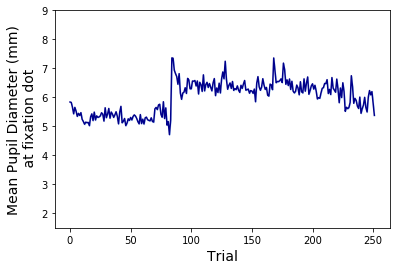

In [139]:
plt.plot(range(len(fixation_baseline)), fixation_baseline['MEAN_PS'], color='darkblue')
plt.fill_between(range(len(fixation_baseline)), fixation_baseline['CI_LOW_PS'], fixation_baseline['CI_UP_PS'], facecolor="orange", color='dodgerblue', alpha=0.2)
plt.ylim([1.5, 9])
plt.ylabel('Mean Pupil Diameter (mm)\n at fixation dot', fontsize=14)
plt.xlabel('Trial', fontsize=14)

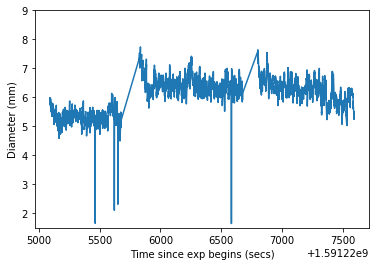

In [62]:
fixation_data = df_final[df_final['EVENT'] == 'fixation']
plt.plot(fixation_data['timestamp'], fixation_data['diameter_3d [mm]'])

# plt.hlines(eye_0_fix_cleaned, minimum_cleaned, maximum_cleaned, color='salmon', label='left baseline')
# plt.hlines(eye_1_fix_cleaned, minimum_cleaned, maximum_cleaned, color='lightblue', label='right baseline')
# plt.vlines(trial_adjustment_ts_corrected, 1.5, 9, color='k', linestyle='--', label = 'adjustment task starts')
plt.xlabel('Time since exp begins (secs)')
plt.ylabel('Diameter (mm)')
plt.ylim([1.5, 9])
# plt.xlim([0, 7])
plt.show()

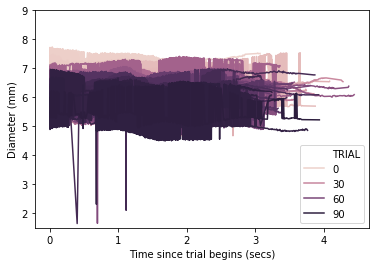

In [63]:
fixation_data = df_final[df_final['EVENT'] == 'fixation']
sns.lineplot(fixation_data['TIMESTAMP_CORRECT'], fixation_data['diameter_3d [mm]'], hue=fixation_data['TRIAL'])

# plt.hlines(eye_0_fix_cleaned, minimum_cleaned, maximum_cleaned, color='salmon', label='left baseline')
# plt.hlines(eye_1_fix_cleaned, minimum_cleaned, maximum_cleaned, color='lightblue', label='right baseline')
# plt.vlines(trial_adjustment_ts_corrected, 1.5, 9, color='k', linestyle='--', label = 'adjustment task starts')
plt.xlabel('Time since trial begins (secs)')
plt.ylabel('Diameter (mm)')
plt.ylim([1.5, 9])
# plt.xlim([0, 7])
plt.legend()
plt.show()

# Checking length of blocks 

In [64]:
trial_unique = behavioral_data.trialNumber.unique()
block_unique = behavioral_data.blockNumber.unique()

fixation_time_df = pd.DataFrame()

row=0

for block in block_unique:
    if not np.isnan(block):

        for trial_number in trial_unique:
            if not np.isnan(trial_number):
                
                fix_df = df_final.loc[(df_final['BLOCK'] == block) & (df_final['TRIAL'] == trial_number) & (df_final['EVENT'] == 'fixation')].reset_index(drop=True)

                fixation_time = fix_df.loc[0, 'TIMESTAMP_CORRECT']
                
                fixation_time_df.loc[row, 'BLOCK'] = block
                fixation_time_df.loc[row, 'TRIAL'] = trial_number
                fixation_time_df.loc[row, 'FIXATION_TIME'] = fixation_time
                
                row += 1
                
                


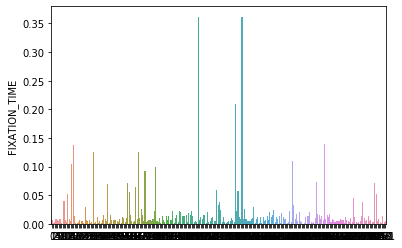

In [65]:
sns.barplot(np.arange(len(fixation_time_df)), fixation_time_df['FIXATION_TIME'])

In [66]:
trial_unique = behavioral_data.trialNumber.unique()
block_unique = behavioral_data.blockNumber.unique()

blob_time_df = pd.DataFrame()

row=0

for block in block_unique:
    if not np.isnan(block):

        for trial_number in trial_unique:
            if not np.isnan(trial_number):
                
                blob_df = df_final.loc[(df_final['BLOCK'] == block) & (df_final['TRIAL'] == trial_number) & (df_final['EVENT'] == 'blob')]

                blob_time = blob_df.iloc[-1]
                blob_time = blob_time['TIMESTAMP_CORRECT_IMONSET']
                
                blob_time_df.loc[row, 'BLOCK'] = block
                blob_time_df.loc[row, 'TRIAL'] = trial_number
                blob_time_df.loc[row, 'BLOB_TIME'] = blob_time
                
                row += 1
                
                


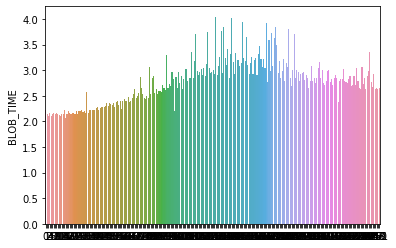

In [67]:
sns.barplot(np.arange(len(blob_time_df)), blob_time_df['BLOB_TIME'])

# Compare sd vs. no sd 

In [68]:
sd_blob = df_final[(df_final['SD_CONDITION'] == 'SD') & (df_final['EVENT'] == 'blob')]
nosd_blob = df_final[(df_final['SD_CONDITION'] == 'NO_SD') & (df_final['EVENT'] == 'blob')]


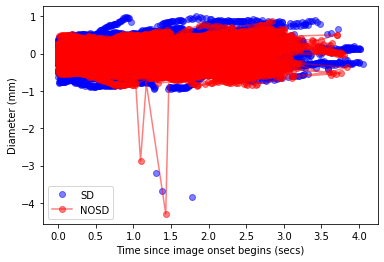

In [69]:
plt.plot(sd_blob['TIMESTAMP_CORRECT_IMONSET'], sd_blob['PS_CORRECTED'], color='blue', label = 'SD', marker='o', linestyle='none', alpha=0.5)

plt.plot(nosd_blob['TIMESTAMP_CORRECT_IMONSET'], nosd_blob['PS_CORRECTED'], color='red', label = 'NOSD', marker='o', linestyle='-', alpha=0.5)


plt.xlabel('Time since image onset begins (secs)')
plt.ylabel('Diameter (mm)')
# plt.ylim([1.5, 9])
# plt.xlim([0, 7])
plt.legend()
plt.show()

# Count samples per trial and per second 

In [70]:
test_times = [sd_blob['TIMESTAMP_CORRECT_IMONSET'], nosd_blob['TIMESTAMP_CORRECT_IMONSET']]

In [71]:
# find how many samples of image onset there are per trial
trial_unique = behavioral_data.trialNumber.unique()
block_unique = behavioral_data.blockNumber.unique()

samples_per_trial = pd.DataFrame()

row=0

for block in block_unique:
    if not np.isnan(block):

        for trial_number in trial_unique:
            if not np.isnan(trial_number):
                im_onset = df_final[(df_final['BLOCK'] == block) & (df_final['TRIAL'] == trial_number) & (df_final['EVENT'] == 'blob')]
                print('Block: ' + str(block) + '. Trial: ' + str(trial_number) + ' = ' + str(len(im_onset)) + ' samples')
                
                samples_per_trial.loc[row, 'BLOCK'] = block
                samples_per_trial.loc[row, 'TRIAL'] = trial
                samples_per_trial.loc[row, 'NSAMPLES'] = len(im_onset)
                
                row += 1
                

Block: 1.0. Trial: 1.0 = 249 samples
Block: 1.0. Trial: 2.0 = 252 samples
Block: 1.0. Trial: 3.0 = 228 samples
Block: 1.0. Trial: 4.0 = 233 samples
Block: 1.0. Trial: 5.0 = 224 samples
Block: 1.0. Trial: 6.0 = 220 samples
Block: 1.0. Trial: 7.0 = 247 samples
Block: 1.0. Trial: 8.0 = 248 samples
Block: 1.0. Trial: 9.0 = 245 samples
Block: 1.0. Trial: 10.0 = 231 samples
Block: 1.0. Trial: 11.0 = 231 samples
Block: 1.0. Trial: 12.0 = 223 samples
Block: 1.0. Trial: 13.0 = 212 samples
Block: 1.0. Trial: 14.0 = 241 samples
Block: 1.0. Trial: 15.0 = 259 samples
Block: 1.0. Trial: 16.0 = 214 samples
Block: 1.0. Trial: 17.0 = 236 samples
Block: 1.0. Trial: 18.0 = 254 samples
Block: 1.0. Trial: 19.0 = 192 samples
Block: 1.0. Trial: 20.0 = 225 samples
Block: 1.0. Trial: 21.0 = 226 samples
Block: 1.0. Trial: 22.0 = 236 samples
Block: 1.0. Trial: 23.0 = 230 samples
Block: 1.0. Trial: 24.0 = 236 samples
Block: 1.0. Trial: 25.0 = 237 samples
Block: 1.0. Trial: 26.0 = 254 samples
Block: 1.0. Trial: 27

Block: 3.0. Trial: 57.0 = 210 samples
Block: 3.0. Trial: 58.0 = 186 samples
Block: 3.0. Trial: 59.0 = 180 samples
Block: 3.0. Trial: 60.0 = 187 samples
Block: 3.0. Trial: 61.0 = 180 samples
Block: 3.0. Trial: 62.0 = 191 samples
Block: 3.0. Trial: 63.0 = 210 samples
Block: 3.0. Trial: 64.0 = 173 samples
Block: 3.0. Trial: 65.0 = 223 samples
Block: 3.0. Trial: 66.0 = 196 samples
Block: 3.0. Trial: 67.0 = 168 samples
Block: 3.0. Trial: 68.0 = 196 samples
Block: 3.0. Trial: 69.0 = 212 samples
Block: 3.0. Trial: 70.0 = 202 samples
Block: 3.0. Trial: 71.0 = 234 samples
Block: 3.0. Trial: 72.0 = 180 samples
Block: 3.0. Trial: 73.0 = 189 samples
Block: 3.0. Trial: 74.0 = 210 samples
Block: 3.0. Trial: 75.0 = 185 samples
Block: 3.0. Trial: 76.0 = 144 samples
Block: 3.0. Trial: 77.0 = 131 samples
Block: 3.0. Trial: 78.0 = 199 samples
Block: 3.0. Trial: 79.0 = 191 samples
Block: 3.0. Trial: 80.0 = 194 samples
Block: 3.0. Trial: 81.0 = 226 samples
Block: 3.0. Trial: 82.0 = 212 samples
Block: 3.0. 

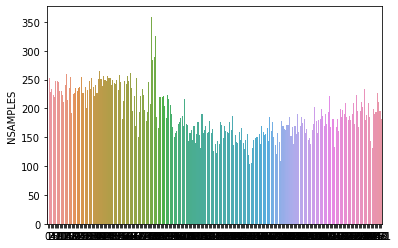

In [72]:
sns.barplot(np.arange(len(samples_per_trial)), samples_per_trial['NSAMPLES'])

In [73]:
np.mean(samples_per_trial['NSAMPLES'])

191.45238095238096

How many samples per second?

In [74]:

initial_ts = df_final.loc[0, 'timestamp']
count_list = list()
count_samples = 0

for row in range(len(df_final)):
    
    
    if row > 0:
        
        time_elapsed = df_final.loc[row, 'timestamp'] - initial_ts
        
        if time_elapsed >= 1: # if one second has passed already, then initialized initial_ts:
        
            initial_ts = df_final.loc[row, 'timestamp']
            count_list.append(count_samples)
            
            count_samples= 0
        else:
            
            count_samples += 1

In [75]:
count_list

[123,
 115,
 104,
 123,
 123,
 108,
 112,
 108,
 123,
 105,
 104,
 121,
 89,
 122,
 123,
 97,
 119,
 105,
 108,
 121,
 112,
 93,
 99,
 113,
 87,
 123,
 123,
 109,
 85,
 117,
 78,
 123,
 123,
 110,
 95,
 112,
 102,
 123,
 122,
 94,
 106,
 115,
 105,
 123,
 106,
 123,
 97,
 89,
 122,
 101,
 123,
 123,
 105,
 110,
 121,
 90,
 123,
 123,
 98,
 103,
 121,
 91,
 123,
 123,
 101,
 120,
 93,
 104,
 120,
 123,
 103,
 123,
 109,
 123,
 78,
 113,
 116,
 123,
 78,
 113,
 98,
 123,
 123,
 95,
 119,
 109,
 107,
 109,
 123,
 93,
 120,
 70,
 111,
 113,
 91,
 123,
 100,
 123,
 115,
 92,
 105,
 123,
 97,
 113,
 123,
 103,
 111,
 116,
 107,
 74,
 115,
 47,
 123,
 106,
 123,
 95,
 66,
 97,
 83,
 123,
 123,
 122,
 87,
 109,
 65,
 118,
 118,
 104,
 123,
 123,
 102,
 67,
 80,
 111,
 111,
 82,
 123,
 100,
 55,
 119,
 107,
 123,
 108,
 122,
 78,
 107,
 86,
 123,
 104,
 107,
 104,
 114,
 93,
 123,
 123,
 74,
 112,
 103,
 123,
 108,
 98,
 106,
 106,
 95,
 101,
 123,
 75,
 123,
 108,
 73,
 123,
 112,
 98,
 123,
 

(array([ 47., 145., 231., 247., 303., 349., 382., 285., 227., 182.]),
 array([  0. ,  12.3,  24.6,  36.9,  49.2,  61.5,  73.8,  86.1,  98.4,
        110.7, 123. ]),
 <a list of 10 Patch objects>)

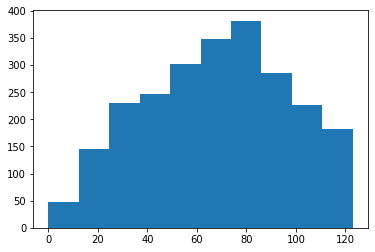

In [76]:
plt.hist(count_list)

In [78]:
median_pupil_samples_per_sec = int(np.median(count_list))
print(type(median_pupil_samples_per_sec))
print(median_pupil_samples_per_sec)

<class 'int'>
70


# Align timestamps 

In [79]:
max_time  = int(np.max(df_final.loc[df_final['EVENT'] == 'blob', 'TIMESTAMP_CORRECT_IMONSET']))


We have a maximum of 4 seconds, with a median of 70 samples

In [80]:
times_selected = np.linspace(0, max_time, median_pupil_samples_per_sec*max_time)

In [83]:

trial_unique = behavioral_data.trialNumber.unique()
block_unique = behavioral_data.blockNumber.unique()

df_matched = pd.DataFrame()

row=0

for block in block_unique:
    if not np.isnan(block):
        
        print('Block number: ' + str(block))
        for trial_number in trial_unique:
            
            if not np.isnan(trial_number):
                print('Trial number: ' + str(trial_number))

                # first loop through the times selected:
                df_trial = df_final[(df_final['BLOCK'] == block) & (df_final['TRIAL'] == trial_number) & (df_final['EVENT'] == 'blob')].reset_index(drop=True)
                type_sd = df_trial.loc[0, 'SD_CONDITION']
                for time_sel in times_selected:
                    if time_sel < df_trial.iloc[-1]['TIMESTAMP_CORRECT_IMONSET']:
                        print('Time selected: ' + str(time_sel))
                        # find closest timestamp in df both + and -
                        closest_number, closest_number_idx = numbers.closest_index(df_trial['TIMESTAMP_CORRECT_IMONSET'], time_sel)
#                             print(closest_number)
                        if (closest_number_idx != 0) & (closest_number_idx != len(df_trial)):
                            # is it above or below the time selected?
                            if closest_number < time_sel: # the timestamp found is smaller than the time selected

                                closest_number_1 = closest_number
                                closest_number_1_idx = closest_number_idx
                                # then the next closest number should be + 1 of the first one
                                closest_number_2_idx = closest_number_1_idx + 1
                                closest_number_2 = df_trial.loc[closest_number_2_idx, 'TIMESTAMP_CORRECT_IMONSET']

                            elif closest_number > time_sel: # the timestamp found is bigger than the time selected
                                closest_number_2 = closest_number
                                closest_number_2_idx = closest_number_idx
                                # then the next closest number should be - 1 of the first one
                                closest_number_1_idx = closest_number_2_idx - 1

                                closest_number_1 = df_trial.loc[closest_number_1_idx, 'TIMESTAMP_CORRECT_IMONSET']

                            duration = closest_number_2 - closest_number_1

                            pupil_size_1_corrected = df_trial.loc[closest_number_1_idx, 'PS_CORRECTED']
                            pupil_size_2_corrected = df_trial.loc[closest_number_2_idx, 'PS_CORRECTED']
                            change_pupil_size_corrected = pupil_size_2_corrected - pupil_size_1_corrected

                            pupil_extrapolated_corrected = pupil_size_1_corrected + (change_pupil_size_corrected * ((time_sel-closest_number_1)/duration))

                            pupil_size_1 = df_trial.loc[closest_number_1_idx, 'diameter_3d [mm]']
                            pupil_size_2 = df_trial.loc[closest_number_2_idx, 'diameter_3d [mm]']
                            change_pupil_size = pupil_size_2 - pupil_size_1

                            pupil_extrapolated = pupil_size_1 + (change_pupil_size * ((time_sel-closest_number_1)/duration))

                            # include in dataframe
                            df_matched.loc[row, 'BLOCK'] = block
                            df_matched.loc[row, 'TRIAL'] = trial_number
                            df_matched.loc[row, 'SD_CONDITION'] = type_sd
                            df_matched.loc[row, 'TIMESTAMP_IMONSET'] = time_sel
                            df_matched.loc[row, 'PUPIL_SIZE_CORRECTED'] = pupil_extrapolated_corrected
                            df_matched.loc[row, 'PUPIL_SIZE'] = pupil_extrapolated

                        elif closest_number_idx == 0:
                            pupil_extrapolated_corrected = df_trial.loc[0, 'PS_CORRECTED']
                            pupil_extrapolated = df_trial.loc[0, 'diameter_3d [mm]']
                            df_matched.loc[row, 'BLOCK'] = block
                            df_matched.loc[row, 'TRIAL'] = trial_number
                            df_matched.loc[row, 'SD_CONDITION'] = type_sd
                            df_matched.loc[row, 'TIMESTAMP_IMONSET'] = time_sel
                            df_matched.loc[row, 'PUPIL_SIZE_CORRECTED'] = pupil_extrapolated_corrected
                            df_matched.loc[row, 'PUPIL_SIZE'] = pupil_extrapolated

                        elif closest_number_idx == len(df_trial):
                            pupil_extrapolated_corrected = df_trial.iloc[-1]['PS_CORRECTED']
                            pupil_extrapolated = df_trial.iloc[-1]['diameter_3d [mm]']
                            df_matched.loc[row, 'BLOCK'] = block
                            df_matched.loc[row, 'TRIAL'] = trial_number
                            df_matched.loc[row, 'SD_CONDITION'] = type_sd
                            df_matched.loc[row, 'TIMESTAMP_IMONSET'] = time_sel
                            df_matched.loc[row, 'PUPIL_SIZE_CORRECTED'] = pupil_extrapolated_corrected
                            df_matched.loc[row, 'PUPIL_SIZE'] = pupil_extrapolated


                        row += 1

Block number: 1.0
Trial number: 1.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time se

Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Trial number: 3.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time

Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected:

Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179

Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.462

Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630

Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected:

Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Trial number: 14.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
T

Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected:

Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 

Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 

Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.39068100

Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982

Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645


Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.9498

Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806

Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time sele

Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Trial number: 32.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14

Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5

Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.0609

Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Trial number: 37.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.0716845878

Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected:

Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.089605

Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Trial number: 42.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025

Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508

Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time

Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458

Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.01

Trial number: 50.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336

Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982

Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752

Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Trial number: 55.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544

Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5

Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Tim

Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
T

Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.13261648

Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time se

Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.175627240

Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Trial number: 66.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 

Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.419354

Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Trial number: 69.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected:

Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480

Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823

Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected:

Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected:

Trial number: 76.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336

Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.49

Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Trial number: 79.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.2580645161290

Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selecte

Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.9784946

Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Trial number: 83.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selecte

Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.01

Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.0215053763

Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165

Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5

Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.69

Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465

Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time se

Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Trial number: 10.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.200716845878136

Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.362007168

Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time 

Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100

Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 

Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885

Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Trial number: 18.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.315412186379928

Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982

Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time 

Trial number: 22.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336

Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.089605

Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time 

Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Trial number: 26.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0

Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806

Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.06451612903225

Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Trial number: 30.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time select

Time selected: 3.2688172043010755
Time selected: 3.283154121863799
Time selected: 3.2974910394265233
Time selected: 3.3118279569892475
Time selected: 3.326164874551971
Time selected: 3.3405017921146953
Time selected: 3.3548387096774195
Time selected: 3.369175627240143
Time selected: 3.3835125448028673
Time selected: 3.3978494623655915
Time selected: 3.412186379928315
Time selected: 3.4265232974910393
Time selected: 3.4408602150537635
Time selected: 3.4551971326164876
Time selected: 3.4695340501792113
Time selected: 3.4838709677419355
Time selected: 3.4982078853046596
Time selected: 3.5125448028673834
Time selected: 3.5268817204301075
Time selected: 3.5412186379928317
Time selected: 3.5555555555555554
Time selected: 3.5698924731182795
Time selected: 3.5842293906810037
Time selected: 3.598566308243728
Time selected: 3.6129032258064515
Time selected: 3.6272401433691757
Time selected: 3.6415770609319
Time selected: 3.6559139784946235
Time selected: 3.6702508960573477
Time selected: 3.68458

Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.089605

Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time se

Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Trial number: 35.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time 

Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455

Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time se

Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Trial number: 39.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.329749103942652

Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time 

Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 

Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379

Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time 

Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5

Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.419354

Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.480286738351

Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time selected: 3.182795698924731
Time selected: 3.197132616487455
Time selected: 3.2114695340501793
Time selected: 3.225806451612903
Time selected: 3.240143369175627
Time selected: 3.2544802867383513
Trial number: 49.0
Time selected: 0.0
Time selected: 0.0143369175627240

Time selected: 3.369175627240143
Time selected: 3.3835125448028673
Time selected: 3.3978494623655915
Time selected: 3.412186379928315
Time selected: 3.4265232974910393
Time selected: 3.4408602150537635
Time selected: 3.4551971326164876
Time selected: 3.4695340501792113
Time selected: 3.4838709677419355
Time selected: 3.4982078853046596
Time selected: 3.5125448028673834
Time selected: 3.5268817204301075
Time selected: 3.5412186379928317
Time selected: 3.5555555555555554
Time selected: 3.5698924731182795
Time selected: 3.5842293906810037
Time selected: 3.598566308243728
Time selected: 3.6129032258064515
Time selected: 3.6272401433691757
Time selected: 3.6415770609319
Time selected: 3.6559139784946235
Time selected: 3.6702508960573477
Time selected: 3.684587813620072
Time selected: 3.6989247311827955
Time selected: 3.7132616487455197
Time selected: 3.727598566308244
Time selected: 3.7419354838709675
Time selected: 3.7562724014336917
Trial number: 50.0
Time selected: 0.0
Time selected: 0.0

Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected:

Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected

Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.37634408

Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Ti

Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time 

Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time selected: 3.182795698924731
Time selected: 3.197132616487455
Time selected: 3.2114695340501793
Time selected: 3.225806451612903
Time

Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time selected: 3.182795698924731
Time selected: 3.197132616487455
Time selected: 3.2114695340501793
Time selected: 3.225806451612903
Time selected: 3.240143369175627
Time selected: 3.2544802867383513
Time selected: 3.2688172043010755
Time selected: 3.283154121863799
Time selected: 3.2974910394265233
Time selected: 3.3118279569892475
Time selected: 3.326164874551971
Time selected: 3.3405017921146953
Time selected: 3.3548387096774195
Time selected: 3.369175627240143
Time selected: 3.3835125448028673
Time selected: 3.3978494623655915
Time selected: 3.412186379928315
Time selected: 3.4265232974910393
Time selected: 3.4408602150537635
Time selected: 3.4551971326164876
Time selected: 3.4695340501792113
Time selected: 3.4838709677419355
Time selected: 3.4982078853046596
Time selected: 3.5125448028673834
Time selected: 3.5268817204301075
Time selected: 3.5412186379928317
Time selected: 3.5555555

Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Trial number: 59.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.04301075268

Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time 

Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected:

Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508

Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected:

Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713

Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Tim

Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.91039426

Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Trial number: 68.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time sele

Time selected: 3.4838709677419355
Time selected: 3.4982078853046596
Time selected: 3.5125448028673834
Time selected: 3.5268817204301075
Time selected: 3.5412186379928317
Time selected: 3.5555555555555554
Time selected: 3.5698924731182795
Time selected: 3.5842293906810037
Time selected: 3.598566308243728
Time selected: 3.6129032258064515
Time selected: 3.6272401433691757
Time selected: 3.6415770609319
Time selected: 3.6559139784946235
Trial number: 69.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022


Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selecte

Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1

Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.9784946

Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time se

Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time

Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time selected: 3.182795698924731
Time selected: 3.197132616487455
Time selected: 3.2114695340501793
Time selected: 3.225806451612903
Trial number: 76.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time

Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.07526

Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected:

Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time s

Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383

Trial number: 82.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336

Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630

Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103

Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
T

Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.72

Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Time selected: 3.082437275985663
Time selected: 3.096774193548387
Time selected: 3.111111111111111
Time selected: 3.1254480286738353
Time selected: 3.139784946236559
Time selected: 3.154121863799283
Time selected: 3.1684587813620073
Time selected: 3.182795698924731
Time selected: 3.197132616487455
Time selected: 3.2114695340501793
Time

Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Time selected: 2.996415770609319
Time selected: 3.010752688172043
Time selected: 3.025089605734767
Time selected: 3.039426523297491
Time selected: 3.053763440860215
Time selected: 3.068100358422939
Trial number: 5.0
Time selected: 0.0
Time selected: 0.014336917562724

Time selected: 3.3978494623655915
Time selected: 3.412186379928315
Time selected: 3.4265232974910393
Time selected: 3.4408602150537635
Time selected: 3.4551971326164876
Time selected: 3.4695340501792113
Time selected: 3.4838709677419355
Time selected: 3.4982078853046596
Time selected: 3.5125448028673834
Time selected: 3.5268817204301075
Time selected: 3.5412186379928317
Time selected: 3.5555555555555554
Time selected: 3.5698924731182795
Time selected: 3.5842293906810037
Time selected: 3.598566308243728
Time selected: 3.6129032258064515
Time selected: 3.6272401433691757
Trial number: 6.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
T

Time selected: 3.6415770609319
Time selected: 3.6559139784946235
Time selected: 3.6702508960573477
Time selected: 3.684587813620072
Time selected: 3.6989247311827955
Time selected: 3.7132616487455197
Time selected: 3.727598566308244
Time selected: 3.7419354838709675
Time selected: 3.7562724014336917
Time selected: 3.770609318996416
Time selected: 3.78494623655914
Time selected: 3.7992831541218637
Time selected: 3.813620071684588
Time selected: 3.827956989247312
Trial number: 7.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time sel

Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time 

Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 

Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Tim

Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.982078853046595
Trial number: 12.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 

Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time sele

Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected:

Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Ti

Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Time selected: 2.867383512544803
Time selected: 2.881720430107527
Time selected: 2.8960573476702507
Time selected: 2.910394265232975
Time selected: 2.924731182795699
Time selected: 2.939068100358423
Time selected: 2.953405017921147
Time selected: 2.967741935483871
Time selected: 2.9820788530465

Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Time selected: 2.8530465949820787
Trial number: 18.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selec

Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.14695340

Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.

Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.9498

Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752

Time selected: 2.967741935483871
Trial number: 24.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.38709677

Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455

Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.0501792114695

Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.7956

Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time 

Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333

Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982

Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Trial number: 33.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time sel

Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Ti

Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982

Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.9784946

Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Time selected: 2.824372759856631
Time selected: 2.838709677419355
Trial number: 38.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.301075268817204

Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time sele

Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.07526

Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time 

Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.69

Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time sele

Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.

Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100

Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected:

Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 

Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100

Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected:

Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415

Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time sele

Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected:

Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.7956

Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time select

Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1

Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781362007168459
Time selected: 2.795698924731183
Time selected: 2.8100358422939067
Trial number: 62.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time select

Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time s

Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 1.5770609318996416
Time selected: 1.5913978494623655
Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected:

Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734767026
Time selected: 2.5232974910394264
Time selected: 2.5376344086021505
Time selected: 2.5519713261648747
Time selected: 2.5663082437275984
Time selected: 2.5806451612903225
Time selected: 2.5949820788530467
Time selected: 2.609318996415771
Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Time selected: 2.652329749103943
Time selected: 2.6666666666666665
Time selected: 2.6810035842293907
Time selected: 2.695340501792115
Time selected: 2.7096774193548385
Time selected: 2.7240143369175627
Time selected: 2.738351254480287
Time selected: 2.752688172043011
Time selected: 2.7670250896057347
Time selected: 2.781

Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected

Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.5340501792114696
Time selected: 1.5483870967741935
Time selected: 1.5627240143369177
Time selected: 

Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.49462365591

Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time selected: 0.6021505376344086
Time selected: 0.6164874551971327
Time selected: 0.6308243727598566
Time selected: 0.6451612903225806
Time selected: 0.6594982078853047
Time selected: 0.6738351254480287
Time selected: 0.6881720430107527
Time selected: 0.7025089605734767
Time selected: 0.7168458781362007
Time selected: 0.7311827956989247
Time selected: 0.7455197132616488
Time selected: 0.7598566308243727
Time selected: 0.7741935483870968
Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected:

Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.3763440860215055
Time selected: 1.3906810035842294
Time selected: 1.4050179211469533
Time selected: 1.4193548387096775
Time selected: 1.4336917562724014
Time selected: 1.4480286738351253
Time selected: 1.4623655913978495
Time selected: 1.4767025089605734
Time selected: 1.4910394265232976
Time selected: 1.5053763440860215
Time selected: 1.5197132616487454
Time selected: 1.

Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time selected: 2.3655913978494625
Time selected: 2.379928315412186
Time selected: 2.3942652329749103
Time selected: 2.4086021505376345
Time selected: 2.4229390681003586
Time selected: 2.4372759856630823
Time selected: 2.4516129032258065
Time selected: 2.4659498207885306
Time selected: 2.4802867383512543
Time selected: 2.4946236559139785
Time selected: 2.5089605734

Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.45878136200716846
Time selected: 0.4731182795698925
Time selected: 0.4874551971326165
Time selected: 0.5017921146953405
Time selected: 0.5161290322580645
Time selected: 0.5304659498207885
Time selected: 0.5448028673835126
Time selected: 0.5591397849462365
Time selected: 0.5734767025089605
Time selected: 0.5878136200716846
Time 

Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752688172
Time selected: 1.2186379928315412
Time selected: 1.2329749103942653
Time selected: 1.2473118279569892
Time selected: 1.2616487455197132
Time selected: 1.2759856630824373
Time selected: 1.2903225806451613
Time selected: 1.3046594982078854
Time selected: 1.3189964157706093
Time selected: 1.3333333333333333
Time selected: 1.3476702508960574
Time selected: 1.3620071684587813
Time selected: 1.37634408

Time selected: 1.6057347670250897
Time selected: 1.6200716845878136
Time selected: 1.6344086021505377
Time selected: 1.6487455197132617
Time selected: 1.6630824372759856
Time selected: 1.6774193548387097
Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.0215053763

Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
Time selected: 2.121863799283154
Time selected: 2.1362007168458783
Time selected: 2.150537634408602
Time selected: 2.164874551971326
Time selected: 2.1792114695340503
Time selected: 2.193548387096774
Time selected: 2.207885304659498
Time selected: 2.2222222222222223
Time selected: 2.236559139784946
Time selected: 2.25089605734767
Time selected: 2.2652329749103943
Time selected: 2.2795698924731185
Time selected: 2.293906810035842
Time selected: 2.3082437275985663
Time selected: 2.3225806451612905
Time selected: 2.336917562724014
Time selected: 2.3512544802867383
Time 

Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598566308244
Time selected: 0.3870967741935484
Time selected: 0.4014336917562724
Time selected: 0.4157706093189964
Time selected: 0.43010752688172044
Time selected: 0.4444444444444444
Time selected: 0.458781362007168

Time selected: 0.7885304659498208
Time selected: 0.8028673835125448
Time selected: 0.8172043010752689
Time selected: 0.8315412186379928
Time selected: 0.8458781362007168
Time selected: 0.8602150537634409
Time selected: 0.8745519713261649
Time selected: 0.8888888888888888
Time selected: 0.9032258064516129
Time selected: 0.9175627240143369
Time selected: 0.931899641577061
Time selected: 0.946236559139785
Time selected: 0.9605734767025089
Time selected: 0.974910394265233
Time selected: 0.989247311827957
Time selected: 1.003584229390681
Time selected: 1.017921146953405
Time selected: 1.032258064516129
Time selected: 1.0465949820788532
Time selected: 1.060931899641577
Time selected: 1.075268817204301
Time selected: 1.0896057347670252
Time selected: 1.103942652329749
Time selected: 1.118279569892473
Time selected: 1.1326164874551972
Time selected: 1.146953405017921
Time selected: 1.1612903225806452
Time selected: 1.1756272401433692
Time selected: 1.189964157706093
Time selected: 1.2043010752

Time selected: 1.6917562724014337
Time selected: 1.7060931899641576
Time selected: 1.7204301075268817
Time selected: 1.7347670250896057
Time selected: 1.7491039426523298
Time selected: 1.7634408602150538
Time selected: 1.7777777777777777
Time selected: 1.7921146953405018
Time selected: 1.8064516129032258
Time selected: 1.82078853046595
Time selected: 1.8351254480286738
Time selected: 1.8494623655913978
Time selected: 1.863799283154122
Time selected: 1.8781362007168458
Time selected: 1.89247311827957
Time selected: 1.906810035842294
Time selected: 1.9211469534050178
Time selected: 1.935483870967742
Time selected: 1.949820788530466
Time selected: 1.96415770609319
Time selected: 1.978494623655914
Time selected: 1.992831541218638
Time selected: 2.007168458781362
Time selected: 2.021505376344086
Time selected: 2.03584229390681
Time selected: 2.050179211469534
Time selected: 2.064516129032258
Time selected: 2.078853046594982
Time selected: 2.0931899641577063
Time selected: 2.10752688172043
T

Time selected: 2.6236559139784945
Time selected: 2.6379928315412187
Trial number: 84.0
Time selected: 0.0
Time selected: 0.014336917562724014
Time selected: 0.02867383512544803
Time selected: 0.043010752688172046
Time selected: 0.05734767025089606
Time selected: 0.07168458781362007
Time selected: 0.08602150537634409
Time selected: 0.1003584229390681
Time selected: 0.11469534050179211
Time selected: 0.12903225806451613
Time selected: 0.14336917562724014
Time selected: 0.15770609318996415
Time selected: 0.17204301075268819
Time selected: 0.1863799283154122
Time selected: 0.2007168458781362
Time selected: 0.21505376344086022
Time selected: 0.22939068100358423
Time selected: 0.24372759856630824
Time selected: 0.25806451612903225
Time selected: 0.2724014336917563
Time selected: 0.2867383512544803
Time selected: 0.3010752688172043
Time selected: 0.3154121863799283
Time selected: 0.32974910394265233
Time selected: 0.34408602150537637
Time selected: 0.35842293906810035
Time selected: 0.3727598

In [84]:
df_matched

BLOCK  TRIAL SD_CONDITION  TIMESTAMP_IMONSET  PUPIL_SIZE_CORRECTED  \
0        1.0    1.0           SD           0.000000             -0.003201   
1        1.0    1.0           SD           0.014337              0.012215   
2        1.0    1.0           SD           0.028674             -0.007751   
3        1.0    1.0           SD           0.043011             -0.007268   
4        1.0    1.0           SD           0.057348             -0.006785   
...      ...    ...          ...                ...                   ...   
48894    3.0   84.0        NO_SD           2.580645              0.413112   
48895    3.0   84.0        NO_SD           2.594982              0.424440   
48896    3.0   84.0        NO_SD           2.609319              0.435216   
48897    3.0   84.0        NO_SD           2.623656              0.418979   
48898    3.0   84.0        NO_SD           2.637993              0.430832   

       PUPIL_SIZE  
0        5.835496  
1        5.850912  
2        5.830946  
3        5.831429  
4        5.831912  
...           ...  
48894    5.789764  
48895    5.801092  
48896    5.811867  
48897    5.795631  
48898    5.807484  

[48899 rows x 6 columns]

In [85]:
len(df_matched[(df_matched['BLOCK'] == 1) & (df_matched['TRIAL'] == 1)])

155

In [86]:
len(df_matched[(df_matched['BLOCK'] == 1) & (df_matched['TRIAL'] == 2)])

150

# Timeseries means across trials 

In [132]:
conditions = ['SD', 'NO_SD']

for cond in conditions:
    df_matched_wide = pd.DataFrame()
    df_matched_wide.loc[:, 'TIMESTAMP_IMONSET'] = times_selected

    df = df_matched[df_matched['SD_CONDITION'] == cond]
    
    # get number of trials in this condition
    numTrials = len(df.BLOCK.unique()) * len(df.TRIAL.unique())
    
    for block in df.BLOCK.unique():
        for trial in df.TRIAL.unique():
            
            df_tmp = df[(df['BLOCK'] == block)
                    & (df['TRIAL'] == trial)].reset_index(drop=True)
            
#             print(df_tmp['PUPIL_SIZE_CORRECTED'])
            
            column_name = 'BLOCK' + str(block) + 'TRIAL' + str(trial)
            df_matched_wide[column_name] = df_tmp['PUPIL_SIZE_CORRECTED']
            
    # calculate means across trials
    for row in range(len(df_matched_wide)):
        mean, low, high = mean_confidence_interval.mean_sem(df_matched_wide.iloc[row, range(1, numTrials+1)])
        df_matched_wide.loc[row, 'MEAN'] = mean
        df_matched_wide.loc[row, 'SEM_LOW'] = low
        df_matched_wide.loc[row, 'SEM_HIGH'] = high
        
        # get number of NaNs on that timestamp
        df_matched_wide.loc[row, 'COUNT_NAN'] = (np.isnan(df_matched_wide.iloc[row, range(1, numTrials+1)]).sum())/numTrials
            
    if cond == 'SD':
        df_matched_wide_sd = df_matched_wide
        
    elif cond == 'NO_SD':
        df_matched_wide_nosd = df_matched_wide

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py:914: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


# Plot

In [135]:
plot_sd = df_matched_wide_sd[df_matched_wide_sd['TIMESTAMP_IMONSET'] <= 2.5]
plot_nosd = df_matched_wide_nosd[df_matched_wide_nosd['TIMESTAMP_IMONSET'] <= 2.5]

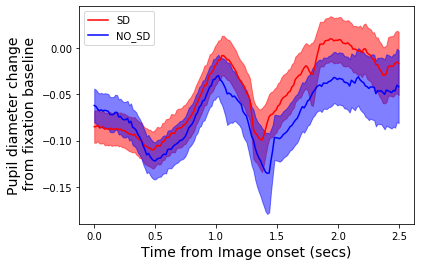

In [136]:
plt.plot(plot_sd['TIMESTAMP_IMONSET'], plot_sd['MEAN'], color='red', label='SD')
plt.fill_between(plot_sd['TIMESTAMP_IMONSET'], plot_sd['SEM_LOW'], plot_sd['SEM_HIGH'], color='red', alpha=0.5)
plt.plot(plot_nosd['TIMESTAMP_IMONSET'], plot_nosd['MEAN'], color='blue', label='NO_SD')
plt.fill_between(plot_nosd['TIMESTAMP_IMONSET'], plot_nosd['SEM_LOW'], plot_nosd['SEM_HIGH'], color='blue', alpha=0.5)
plt.ylabel('Pupil diameter change\n from fixation baseline', fontsize=14)
plt.xlabel('Time from Image onset (secs)', fontsize=14)
plt.legend()


Find out how many data points are nans in each timestamp

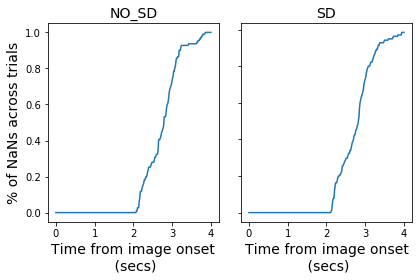

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(df_matched_wide_nosd['TIMESTAMP_IMONSET'], df_matched_wide_nosd['COUNT_NAN'])
ax1.set_xlabel('Time from image onset\n (secs)', fontsize=14)
ax1.set_ylabel('% of NaNs across trials', fontsize=14)
ax1.set_title('NO_SD', fontsize=14)

ax2.plot(df_matched_wide_sd['TIMESTAMP_IMONSET'], df_matched_wide_sd['COUNT_NAN'])
ax2.set_xlabel('Time from image onset\n (secs)', fontsize=14)
ax2.set_ylabel('% of NaNs across trials', fontsize=14)
ax2.set_title('SD', fontsize=14)

for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

It seems we loose 25% of trials at around 2.5, so we will set the cutoff there

In [111]:
sd = df_matched[df_matched['SD_CONDITION'] == 'SD']
x = len(sd.BLOCK.unique()) * len(sd.TRIAL.unique())
np.isnan(df_matched_wide_sd.iloc[-1, range(1, x+1)]).sum()

139

# extra

In [ ]:
x = df_final[(df_final['EVENT'] == 'fixation') & (df_final['TRIAL'] == 1) & (df_final['BLOCK'] == 1)]
x